<a href="https://www.kaggle.com/code/isabbaggin/classification?scriptVersionId=223542884" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datanew/data2/240427SG_BN.xlsx
/kaggle/input/datanew/data2/240511IH_AN.xlsx
/kaggle/input/datanew/data2/240405SM_BN.xlsx
/kaggle/input/datanew/data2/240511IS_BN.xlsx
/kaggle/input/datanew/data2/240420BR_AN.xlsx
/kaggle/input/datanew/data2/240501BD_BP.xlsx
/kaggle/input/datanew/data2/240501SK_BP.xlsx
/kaggle/input/datanew/data2/240420AM_AP.xlsx
/kaggle/input/datanew/data2/240501BD_AP.xlsx
/kaggle/input/datanew/data2/240511BI_BN.xlsx
/kaggle/input/datanew/data2/240427AD_AP.xlsx
/kaggle/input/datanew/data2/240420RM_BP.xlsx
/kaggle/input/datanew/data2/240501DM_BP.xlsx
/kaggle/input/datanew/data2/240229SM_BN.xlsx
/kaggle/input/datanew/data2/240427IM_AN.xlsx
/kaggle/input/datanew/data2/240427BB_BN.xlsx
/kaggle/input/datanew/data2/240501SK_AP.xlsx
/kaggle/input/datanew/data2/240420BM_BP.xlsx
/kaggle/input/datanew/data2/240501DM_AP.xlsx
/kaggle/input/datanew/data2/240511IH_BN.xlsx
/kaggle/input/datanew/data2/240405SM_AN.xlsx
/kaggle/input/datanew/data2/240427SD_AN.xlsx
/kaggle/in

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.widgets import CheckButtons


# def plot_data(matrix):
#     time_per_row = np.arange(0, 12000, 1)  # Time vector for 2400 rows
#     matrix=np.array(matrix)
#     plt.figure(figsize=(20,8))
#     for i in range(matrix.shape[0]):
#       plt.plot(np.array(matrix[i,:]))
#
#     # for i, row in enumerate(MATRIX):
#     #     plt.scatter(time_per_row, row)
#
#     # Adding labels and title
#     plt.title('LH_B_P')
#     plt.xlabel('TIME')
#     plt.ylabel('AMPLITUDE')
#     plt.legend()
#     plt.show()
#
#     # Plot LH data
#     # for i in range(LH_all_pre.shape[0]):
#     #     axs[0].plot(time_per_row, LH_all_pre[i, :, 0])
#     #
#     # axs[0].set_title("LH Data - Time vs Amplitude")
#     # axs[0].set_xlabel("Time (minutes)")
#     # axs[0].set_ylabel("Amplitude")
#     # axs[0].legend()
#     # axs[0].grid(True)
#     #
#     # # Plot RH data
#     # for i in range(RH_all_pre.shape[0]):
#     #     axs[1].plot(time_per_row, RH_all_pre[i, :, 0])
#     #
#     # axs[1].set_title("RH Data - Time vs Amplitude")
#     # axs[1].set_xlabel("Time (minutes)")
#     # axs[1].set_ylabel("Amplitude")
#     # axs[1].legend()
#     # axs[1].grid(True)
#     #
#     # # Plot LL data
#     # for i in range(LL_all_pre.shape[0]):
#     #     axs[2].plot(time_per_row, LL_all_pre[i, :, 0])
#     #
#     # axs[2].set_title("LL Data - Time vs Amplitude")
#     # axs[2].set_xlabel("Time (minutes)")
#     # axs[2].set_ylabel("Amplitude")
#     # axs[2].legend()
#     # axs[2].grid(True)
#     #
#     # # Plot RL data
#     # for i in range(RL_all_pre.shape[0]):
#     #     axs[3].plot(time_per_row, RL_all_pre[i, :, 0])
#     #
#     # axs[3].set_title("RL Data - Time vs Amplitude")
#     # axs[3].set_xlabel("Time (minutes)")
#     # axs[3].set_ylabel("Amplitude")
#     # axs[3].legend()
#     # axs[3].grid(True)
#
#     plt.tight_layout(pad=2.0)
#     plt.show()

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

def plot_with_widgets(matrix):
    matrix = np.array(matrix)
    fig, ax = plt.subplots(figsize=(10, 5))

    # Initial plot
    lines = []
    for i in range(matrix.shape[0]):
        line, = ax.plot(matrix[i, :], label=f'Line {i+1}')
        lines.append(line)
    ax.legend()

    # Create checkboxes for each line
    checkboxes = [widgets.Checkbox(value=True, description=f'Line {i+1}') for i in range(matrix.shape[0])]
    check_ui = widgets.VBox(checkboxes)

    def update_plot(*args):
        # Clear the current axes
        ax.clear()

        # Re-plot only the lines with checked checkboxes
        for i, checkbox in enumerate(checkboxes):
            if checkbox.value:  # If checkbox is checked
                ax.plot(matrix[i, :], label=f'Line {i+1}')

        # Redraw the legend and labels
        ax.legend()
        ax.set_title('Interactive Line Plot')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')

        # Redraw the figure
        fig.canvas.draw()

    # Link the checkboxes to the update_plot function
    for checkbox in checkboxes:
        checkbox.observe(update_plot, 'value')

    # Display the checkboxes UI
    display(check_ui)
    plt.show()






def plot_data(matrix, save_path='C:\\Users\\PC1\\Pictures\\plot\\deviation_post_P.jpg'):
    sns.set(style="whitegrid")
    matrix = np.array(matrix)

    plt.figure(figsize=(20, 10))
    palette = sns.color_palette("husl", matrix.shape[0])
    for i in range(matrix.shape[0]):
        plt.plot(matrix[i, :], color=palette[i], linewidth=1.0)
    plt.title('deviation_post_P', fontsize=16)
    plt.xlabel('TIME', fontsize=14)
    plt.ylabel('AMPLITUDE', fontsize=14)
    plt.legend(title="Data Rows", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    plt.tight_layout()
#     plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()

def plot(matrix, save_path='C:\\Users\\PC1\\Pictures\\plot\\deviation_post_NP.jpg'):
    sns.set(style="whitegrid")
    matrix = np.array(matrix)
    fig, ax = plt.subplots(figsize=(20, 10))
    palette = sns.color_palette("husl", matrix.shape[0])
    lines = []
    for i in range(matrix.shape[0]):
        line, = ax.plot(matrix[i, :], color=palette[i], linewidth=1.0, label=f'Line {i + 1}')
        lines.append(line)
    ax.set_title('deviation_post_NP', fontsize=16)
    ax.set_xlabel('TIME', fontsize=14)
    ax.set_ylabel('AMPLITUDE', fontsize=14)
    labels = [f'Line {i + 1}' for i in range(matrix.shape[0])]
    check = CheckButtons(ax=plt.axes([0.8, 0.4, 0.1, 0.15]), labels=labels, actives=[True] * len(labels))

    for i, line in enumerate(lines):
        check.labels[i].set_color(line.get_color())
    def func(label):
        index = labels.index(label)
        lines[index].set_visible(not lines[index].get_visible())
        plt.draw()

    check.on_clicked(func)

    plt.tight_layout()
    # plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()


def plot_state_means(LH_all_pre_P, RH_all_pre_P, save_path='C:\\Users\\PC1\\Pictures\\plot\\pre_P.jpg'):

    def extract_state_data(combined_LH, combined_RH):
        states = {}
        num_samples = combined_LH.shape[0]  # Number of samples
        num_states = combined_LH.shape[2]    # Number of states (5 in this case)

        for i in range(num_samples):  # Iterate through the samples
            for j in range(num_states):  # Iterate through the states
                state_name = f'State {j + 1}'
                if state_name not in states:
                    states[state_name] = []
                states[state_name].append(combined_LH[i, :, j])  # Append LH data
                states[state_name].append(combined_RH[i, :, j])  # Append RH data

        return states


    state_data_pre_P = extract_state_data(LH_all_pre_P, RH_all_pre_P)
    print(state_data_pre_P)
    means = {}
    for state_name, data in state_data_pre_P.items():
        means[state_name] = [np.mean(data_array) for data_array in data]
    box_data = {state: [] for state in means.keys()}
    for state in means.keys():
        box_data[state].extend(means[state])
    # plt.figure(figsize=(15, 10))
    # sns.boxplot(data=[box_data[state] for state in box_data], palette="Set3")
    # plt.xticks(ticks=np.arange(len(box_data)), labels=box_data.keys())
    # plt.title('Box Plots of Means for Each State')
    # plt.xlabel('States')
    # plt.ylabel('Mean Values')
    # # plt.legend(['Pre P', 'Post P', 'Pre NP', 'Post NP'], loc='upper right')
    # plt.savefig(save_path, format='jpg', dpi=300)
    # plt.tight_layout()
    # plt.show()

# Example usage:
# if __name__ == "__main__":
#     plot_state_means(LH_all_pre_P, RH_all_pre_P, LH_all_post_P, RH_all_post_P,
#                      LH_all_pre_NP, RH_all_pre_NP, LH_all_post_NP, RH_all_post_NP)

def plot_median_of_means(LH_all_pre_P, RH_all_pre_P):

    combined_data = np.concatenate((LH_all_pre_P, RH_all_pre_P), axis=0)

    #Number of states (columns)

    num_states = combined_data.shape[2] # Assuming 5 states as columns 
    means_per_state = []

    # Calculate mean of each column in each 2D array

    for state in range(num_states): 
        means_for_state = []

        for matrix in combined_data: 
            means_for_state.append(np.mean(matrix[:, state])) # Mean of each column for state 
        means_per_state.append(means_for_state)

    return means_per_state


In [6]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis,skew




def calculate_statistics(data_3d):
    data_3d = np.array(pd.to_numeric(data_3d.flatten(), errors='coerce')).reshape(data_3d.shape)


    means = []
    for i in range(data_3d.shape[0]):
        data_without_nans = np.nan_to_num(data_3d[i], nan=0.0)
        mean_value = np.sum(data_without_nans) / (2400 * 5)  # Sum and divide by 2400*5
        means.append(mean_value)

    std_devs = []

    for i in range(data_3d.shape[0]):
        data_without_nans = np.nan_to_num(data_3d[i], nan=0.0)
        mean_value = np.sum(data_without_nans) / (2400 * 5)
        squared_diffs = (data_without_nans - mean_value) ** 2
        std_dev_value = np.sqrt(np.sum(squared_diffs) / (2400 * 5))
        std_devs.append(std_dev_value)
    # std_devs = np.nanstd(data_3d, axis=1)

    return means, std_devs

def flatten_3d_to_2d(array_3d):
    if array_3d.ndim != 3:
        raise ValueError("Input array must be 3D")
    flattened_arrays = np.array([array_3d[i].flatten() for i in range(array_3d.shape[0])])

    return flattened_arrays


# def flatten_3d_to_2d_col(array_3d):
#     array_3d = np.array(array_3d)
#     # if array_3d.ndim != 3:
#     #     raise ValueError("Input array must be 3D")
#     n_slices, rows, cols = array_3d.shape
#     flattened_arrays = []
#     for i in range(n_slices):
#         array_2d = array_3d[i]
#         flattened_array = array_2d.T.flatten()  # Transpose to get columns first, then flatten
#         flattened_arrays.append(flattened_array)
#
#     return np.array(flattened_arrays)

import numpy as np


def flatten_3d_to_2d_col(array_3d):
    target_shape = (2400, 5)  # The desired shape for all 2D arrays

    # Ensure array_3d is a list and handle inconsistent shapes
    if isinstance(array_3d, list):
        padded_arrays = []

        for sub_array in array_3d:
            sub_array = np.asarray(sub_array)

            # Check the shape of the current sub-array
            if sub_array.shape != target_shape:
                # Pad with zeros to make it (2400, 5)
                padded_sub_array = np.zeros(target_shape)
                # Fill in the available data
                rows, cols = sub_array.shape
                padded_sub_array[:rows, :cols] = sub_array
                padded_arrays.append(padded_sub_array)
            else:
                padded_arrays.append(sub_array)

        array_3d = np.array(padded_arrays)

    # Check if the input is now a valid 3D array
    if array_3d.ndim != 3:
        raise ValueError("Input array must be 3D")

    n_slices, rows, cols = array_3d.shape
    flattened_arrays = []

    for i in range(n_slices):
        array_2d = array_3d[i]
        flattened_array = array_2d.T.flatten()  # Transpose to get columns first, then flatten
        flattened_arrays.append(flattened_array)

    return np.array(flattened_arrays)


def z_normalize(array_1d, mean, std_dev):
    return (array_1d - mean) / std_dev


def calculate_normalized_variance_and_kurtosis(data):
    data = np.asarray(data, dtype=float)  # Convert to float, handles None
    data = np.nan_to_num(data)
    normalized_variance = np.var(data, ddof=1)  # Sample variance
    kurt_value = kurtosis(data)
    return normalized_variance, kurt_value

def process_batches_for_normalised(array_1d, batch_size=200):
    num_batches = len(array_1d) // batch_size
    variances = []
    kurtoses = []

    for i in range(num_batches):
        batch = array_1d[i * batch_size:(i + 1) * batch_size]
        var, kurt = calculate_normalized_variance_and_kurtosis(batch)
        variances.append(var)
        kurtoses.append(kurt)

    return np.array(variances), np.array(kurtoses)

def calculate_statistics_in_batches(data):
    # Ensure data is numeric and replace NaN/None with 0
    data = np.asarray(data, dtype=float)  # Convert to float, handles None
    data = np.nan_to_num(data)  # Replace NaN with 0

    # Calculate mean, standard deviation, variance, and skewness
    mean_value = np.mean(data)
    std_dev_value = np.std(data, ddof=1)  # Sample std deviation
    variance_value = np.var(data, ddof=1)  # Sample variance
    skewness_value = skew(data)

    return mean_value, std_dev_value, variance_value, skewness_value

def process_batches_raw(array_1d, batch_size=200):
    num_batches = len(array_1d) // batch_size
    means = []
    stddevs=[]
    variances=[]
    skews=[]

    for i in range(num_batches):
        batch = array_1d[i * batch_size:(i + 1) * batch_size]
        mm, sstd, varr, skewness = calculate_statistics_in_batches(batch)
        variances.append(varr)
        means.append(mm)
        stddevs.append(sstd)
        skews.append(skewness)


    return np.array(means), np.array(stddevs), np.array(variances), np.array(skews)

In [3]:
import os
import numpy as np
import pandas as pd
from tkinter import filedialog
# from plot import plot_data, plot_state_means
# from characteristics import calculate_statistics, flatten_3d_to_2d, z_normalize, \
#    process_batches_for_normalised, process_batches_raw, flatten_3d_to_2d_col
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_extract_data(filepath):
    # try:
    dataall = pd.read_excel(filepath, sheet_name='240229SN').to_numpy()
    # except ValueError as e:
    #     print(f"Error processing {filename}: {e}")


    LH = dataall[:, 11:43:7]
    RH = dataall[:, 12:43:7]
    LL = dataall[:, 13:43:7]
    RL = dataall[:, 14:43:7]

    LH = LH[2:2404, :]
    RH = RH[2:2404, :]
    LL = LL[2:2404, :]
    RL = RL[2:2404, :]



    return LH, RH, LL, RL


def reshape_data(data, target_shape=(2400, 5)):
    if data.shape[0] < target_shape[0]:

        padded = np.zeros(target_shape)
        padded[:data.shape[0], :data.shape[1]] = data
        return padded
    elif data.shape[0] > target_shape[0]:

        return data[:target_shape[0], :target_shape[1]]
    return data

# folder_path = input("Enter the path of the folder containing Excel files: ")
folder_path = '/kaggle/input/datanew/data2'

# folder_path = filedialog.askdirectory(title="Select a folder containing Excel files")
data_dictP = {
    'A': {
        'LH': [],
        'RH': [],
        'LL': [],
        'RL': [],
    },
    'B': {
        'LH': [],
        'RH': [],
        'LL': [],
        'RL': [],
    },
}

data_dictNP = {
    'A': {
        'LH': [],
        'RH': [],
        'LL': [],
        'RL': [],
    },
    'B': {
        'LH': [],
        'RH': [],
        'LL': [],
        'RL': [],
    },
}
print(folder_path)

# for filename in os.listdir(folder_path):
#     if filename.endswith('.xlsx'):
#         filepath = os.path.join(folder_path, filename)
#         try:
#             LH, RH, LL, RL = load_and_extract_data(filepath)
#
#             # Additional debug print to catch string values before processing
#             print(f"Checking for non-numeric values in {filename}")
#             print("LH:", LH)
#             print("RH:", RH)
#
#         except ValueError as e:
#             print(f"Error processing {filename}: {e}")
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_path, filename)
        LH, RH, LL, RL = load_and_extract_data(filepath)

        if filename[9] == 'A':
            if filename[10]=='P':
                data_dictP['A']['LH'].append(reshape_data(LH[:, :5]))
                data_dictP['A']['RH'].append(reshape_data(RH[:, :5]))
                data_dictP['A']['LL'].append(reshape_data(LL[:, :5]))
                data_dictP['A']['RL'].append(reshape_data(RL[:, :5]))
            else:
                data_dictNP['A']['LH'].append(reshape_data(LH[:, :5]))
                data_dictNP['A']['RH'].append(reshape_data(RH[:, :5]))
                data_dictNP['A']['LL'].append(reshape_data(LL[:, :5]))
                data_dictNP['A']['RL'].append(reshape_data(RL[:, :5]))

        elif filename[9] == 'B':
            if filename[10]=='P':
                data_dictP['B']['LH'].append(reshape_data(LH[:, :5]))
                data_dictP['B']['RH'].append(reshape_data(RH[:, :5]))
                data_dictP['B']['LL'].append(reshape_data(LL[:, :5]))
                data_dictP['B']['RL'].append(reshape_data(RL[:, :5]))
            else:
                data_dictNP['B']['LH'].append(reshape_data(LH[:, :5]))
                data_dictNP['B']['RH'].append(reshape_data(RH[:, :5]))
                data_dictNP['B']['LL'].append(reshape_data(LL[:, :5]))
                data_dictNP['B']['RL'].append(reshape_data(RL[:, :5]))


for key in data_dictP:
    for sub_key in data_dictP[key]:
        if data_dictP[key][sub_key]:
            data_dictP[key][sub_key] = np.stack(data_dictP[key][sub_key])
        else:
            data_dictP[key][sub_key] = np.zeros((0, 2400, 5))


def pad_array_to_shape(arr, target_shape):
    arr = np.asarray(arr)
    if arr.dtype.kind in {'U', 'S', 'O'}:
        arr = np.where(arr == ' ', 0, arr)
        arr = arr.astype(float)
    current_shape = arr.shape
    padded_array = np.zeros(target_shape)
    rows = min(current_shape[0], target_shape[0])
    cols = min(current_shape[1], target_shape[1])
    padded_array[:rows, :cols] = arr[:rows, :cols]

    return padded_array

target_shape = (2400, 5)

for key in data_dictNP:
    for sub_key in data_dictNP[key]:
        if data_dictNP[key][sub_key]:
            padded_arrays = [pad_array_to_shape(arr, target_shape) for arr in data_dictNP[key][sub_key]]
            data_dictNP[key][sub_key] = np.stack(padded_arrays)
        else:
            data_dictNP[key][sub_key] = np.zeros((0, *target_shape))

# for key in data_dictNP:
#     for sub_key in data_dictNP[key]:
#         if data_dictNP[key][sub_key]:
#             data_dictNP[key][sub_key] = np.stack(data_dictNP[key][sub_key])
#         else:
#             data_dictNP[key][sub_key] = np.zeros((0, 2400, 5))

# for key in data_dictNP:
#     for sub_key in data_dictNP[key]:
#         try:
#             if data_dictNP[key][sub_key]:
#                 data_dictNP[key][sub_key] = np.stack(data_dictNP[key][sub_key])
#             else:
#                 data_dictNP[key][sub_key] = np.zeros((0, 2400, 5))
#         except ValueError as e:
#             print(f"Error occurred in key: {key}, sub_key: {sub_key}")
#             # print(f"Data: {data_dictNP[key][sub_key]}")
#             print(f"Error message: {e}")


LH_all_pre_P = 1000*data_dictP['B']['LH']
RH_all_pre_P = 1000*data_dictP['B']['RH']
# LL_all_pre_P = data_dictP['B']['LL']
# RL_all_pre_P = data_dictP['B']['RL']

LH_all_post_P = 1000*data_dictP['A']['LH']
RH_all_post_P = 1000*data_dictP['A']['RH']
# LL_all_post_P = data_dictP['A']['LL']
# RL_all_post_P = data_dictP['A']['RL']


LH_all_pre_NP = 1000*data_dictNP['B']['LH']
RH_all_pre_NP = 1000*data_dictNP['B']['RH']
# LL_all_pre_NP = data_dictNP['B']['LL']
# RL_all_pre_NP = data_dictNP['B']['RL']

LH_all_post_NP = 1000*data_dictNP['A']['LH']
RH_all_post_NP = 1000*data_dictNP['A']['RH']
# LL_all_post_NP = data_dictNP['A']['LL']
# RL_all_post_NP = data_dictNP['A']['RL']


   

/kaggle/input/datanew/data2


# RAW DATA PLOTS****

In [12]:
def plot_data(matrix, save_path):
    sns.set(style="whitegrid")
    matrix = np.array(matrix)

    plt.figure(figsize=(20, 10))
#     palette = sns.color_palette("husl", matrix.shape[0])
    for i in range(matrix.shape[0]):
        plt.plot(matrix[i, :],color='blue', linewidth=1.0)
    plt.xlabel('No of samples', fontsize=14)
    plt.ylabel('Amplitude(in mV)', fontsize=14)
    plt.savefig(save_path, format='eps')
    plt.show()

In [7]:
flattened_LH_all_pre_P= flatten_3d_to_2d_col(LH_all_pre_P)
flattened_LH_all_pre_NP= flatten_3d_to_2d_col(LH_all_pre_NP)
flattened_RH_all_pre_P= flatten_3d_to_2d_col(RH_all_pre_P)
flattened_RH_all_pre_NP= flatten_3d_to_2d_col(RH_all_pre_NP)
flattened_LH_all_post_P= flatten_3d_to_2d_col(LH_all_post_P)
flattened_LH_all_post_NP= flatten_3d_to_2d_col(LH_all_post_NP)
flattened_RH_all_post_P= flatten_3d_to_2d_col(RH_all_post_P)
flattened_RH_all_post_NP= flatten_3d_to_2d_col(RH_all_post_NP)

In [8]:
flattened_LH_all_pre_P.shape

(14, 12000)

In [11]:
import numpy as np

# Concatenate row-wise for player data
player_data = np.vstack([
    flattened_LH_all_pre_P, 
    flattened_LH_all_post_P, 
    flattened_RH_all_pre_P, 
    flattened_RH_all_post_P
])

# Concatenate row-wise for non-player data
non_player_data = np.vstack([
    flattened_LH_all_pre_NP, 
    flattened_LH_all_post_NP, 
    flattened_RH_all_pre_NP, 
    flattened_RH_all_post_NP
])

print(player_data.shape, non_player_data.shape)


(56, 12000) (56, 12000)


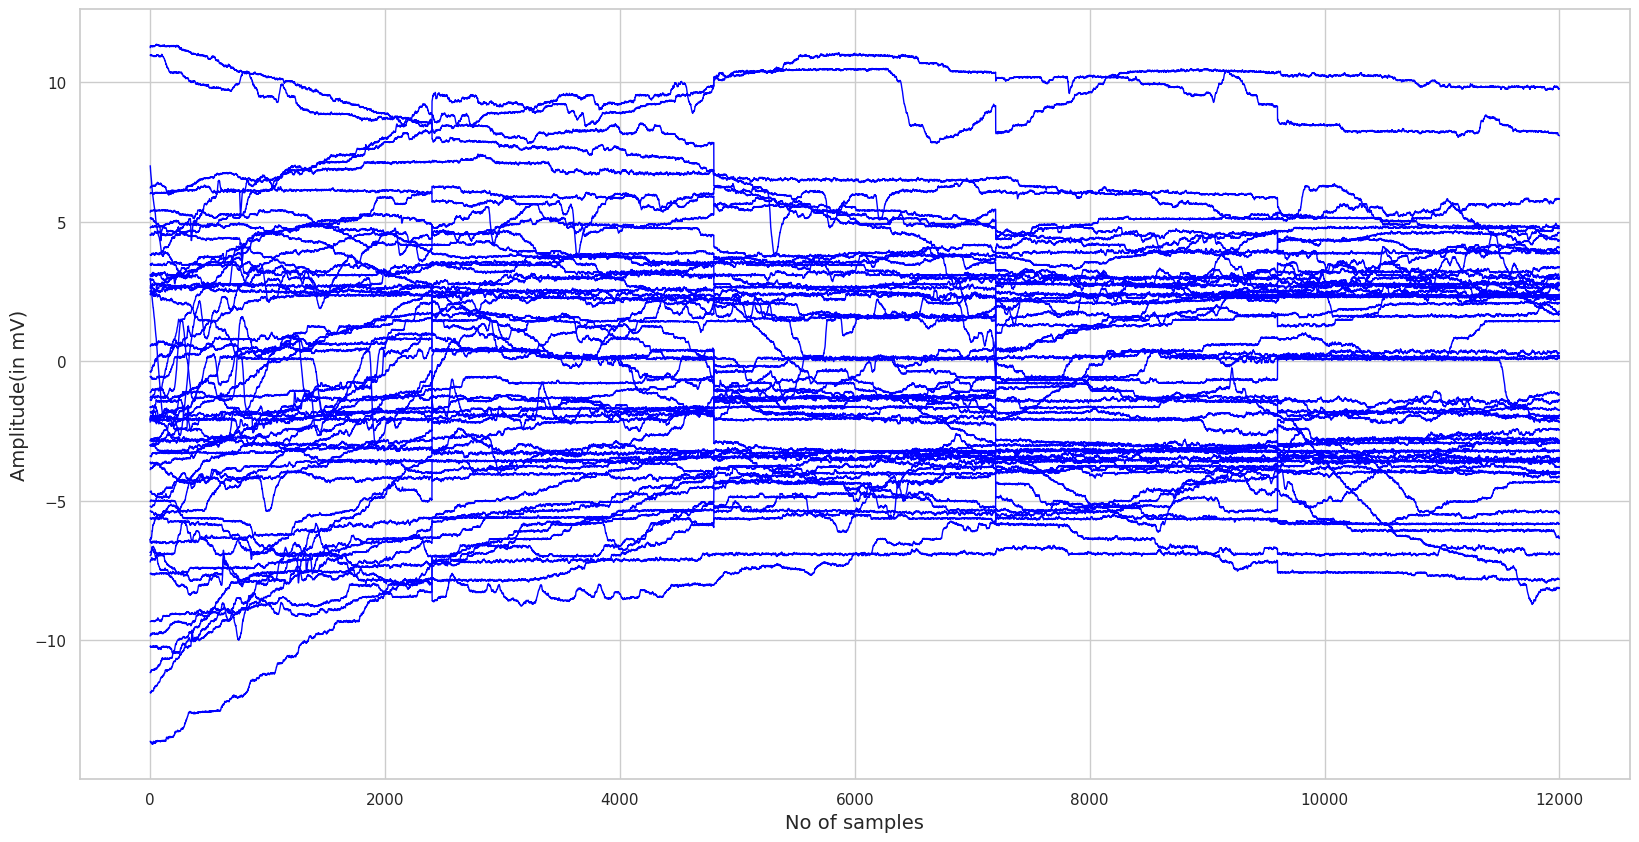

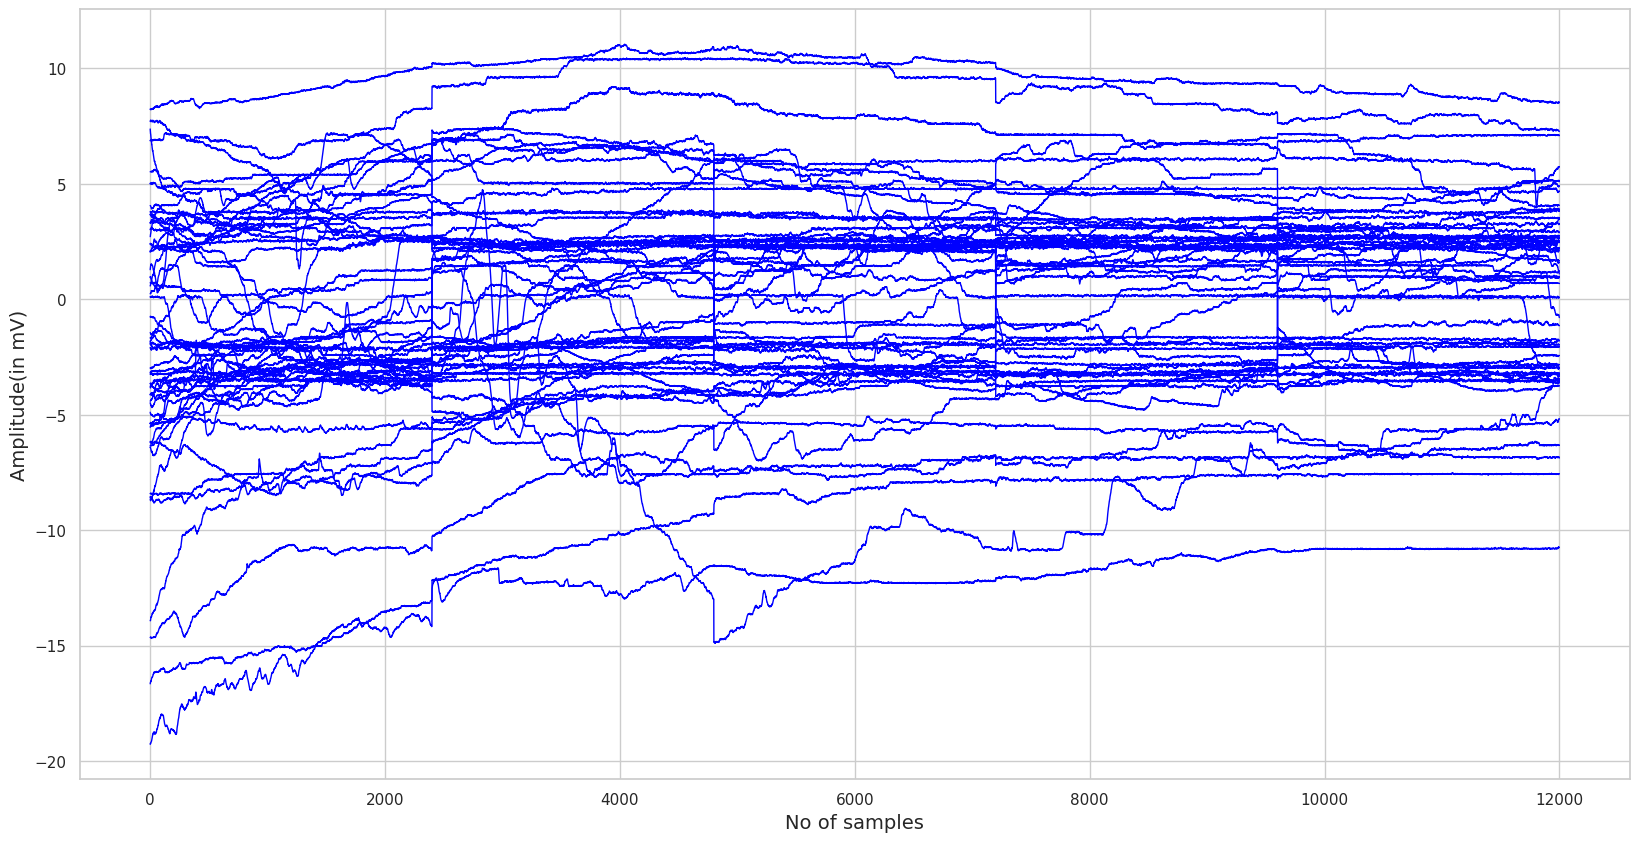

In [13]:
plot_data(player_data,'raw_performer.eps')
plot_data(non_player_data,'raw_nonperformer.eps')

In [ ]:
plot_data(flattened_LH_all_pre_P,'LH_all_pre_P_new.jpg')
plot_data(flattened_RH_all_pre_P,'RH_all_pre_P_new.jpg')
plot_data(flattened_LH_all_post_P,'LH_all_post_P_new.jpg')
plot_data(flattened_RH_all_post_P,'RH_all_post_P_new.jpg')
plot_data(flattened_LH_all_pre_NP,'LH_all_pre_NP_new.jpg')
plot_data(flattened_RH_all_pre_NP,'RH_all_pre_NP_new.jpg')
plot_data(flattened_LH_all_post_NP,'LH_all_post_NP_new.jpg')
plot_data(flattened_RH_all_post_NP,'RH_all_post_NP_new.jpg')

# DEVIATION PLOTS****

In [ ]:
def plot_data(matrix, save_path):
    sns.set(style="whitegrid")
    matrix = np.array(matrix)

    plt.figure(figsize=(20, 10))
#     palette = sns.color_palette("husl", matrix.shape[0])
    for i in range(matrix.shape[0]):
        plt.plot(matrix[i, :],color='blue', linewidth=1.0)
    plt.xlabel('No of samples', fontsize=14)
    plt.ylabel('Amplitude(in mV)', fontsize=14)
    plt.ylim(-8,8)
    plt.savefig(save_path, format='eps')
    plt.show()

In [14]:
def calculate_deviations(LH_all_pre_P, RH_all_pre_P):
    # Initialize output arrays with the same shapes
    LH_all_pre_P_dev = np.zeros_like(LH_all_pre_P)
    RH_all_pre_P_dev = np.zeros_like(RH_all_pre_P)

    # Loop through each 2D array (along the first axis) for LH_all_pre_P
    for i in range(LH_all_pre_P.shape[0]):
        mean_values = np.mean(LH_all_pre_P[i], axis=0)
        LH_all_pre_P_dev[i] = LH_all_pre_P[i] - mean_values

    # Loop through each 2D array (along the first axis) for RH_all_pre_P
    for i in range(RH_all_pre_P.shape[0]):
        mean_values = np.mean(RH_all_pre_P[i], axis=0)
        RH_all_pre_P_dev[i] = RH_all_pre_P[i] - mean_values
    flattened_LH_all_pre_P= flatten_3d_to_2d_col(LH_all_pre_P_dev)
    flattened_RH_all_pre_P= flatten_3d_to_2d_col(RH_all_pre_P_dev)
    deviation_pre_P = np.vstack((flattened_LH_all_pre_P, flattened_RH_all_pre_P))

    return deviation_pre_P


In [15]:
deviation_pre_P=calculate_deviations(LH_all_pre_P, RH_all_pre_P)
deviation_post_P=calculate_deviations(LH_all_post_P, RH_all_post_P)
deviation_pre_NP=calculate_deviations(LH_all_pre_NP, RH_all_pre_NP)
deviation_post_NP=calculate_deviations(LH_all_post_NP, RH_all_post_NP)


In [16]:
deviation_player=np.vstack([
    deviation_pre_P, 
    deviation_post_P
])

deviation_nonplayer=np.vstack([
    deviation_pre_NP, 
    deviation_post_NP
])

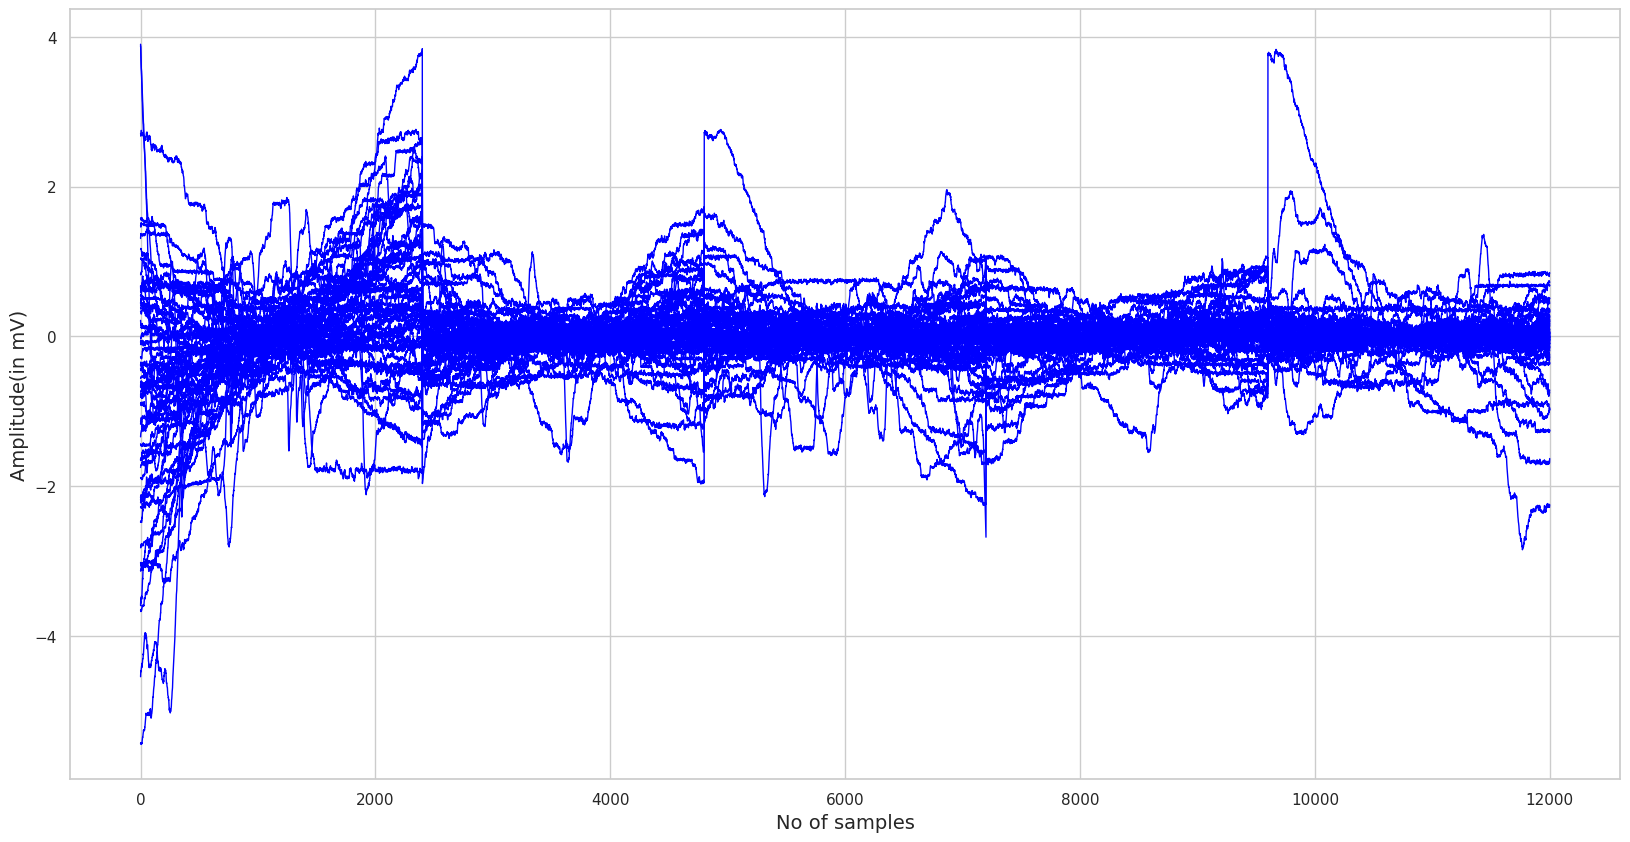

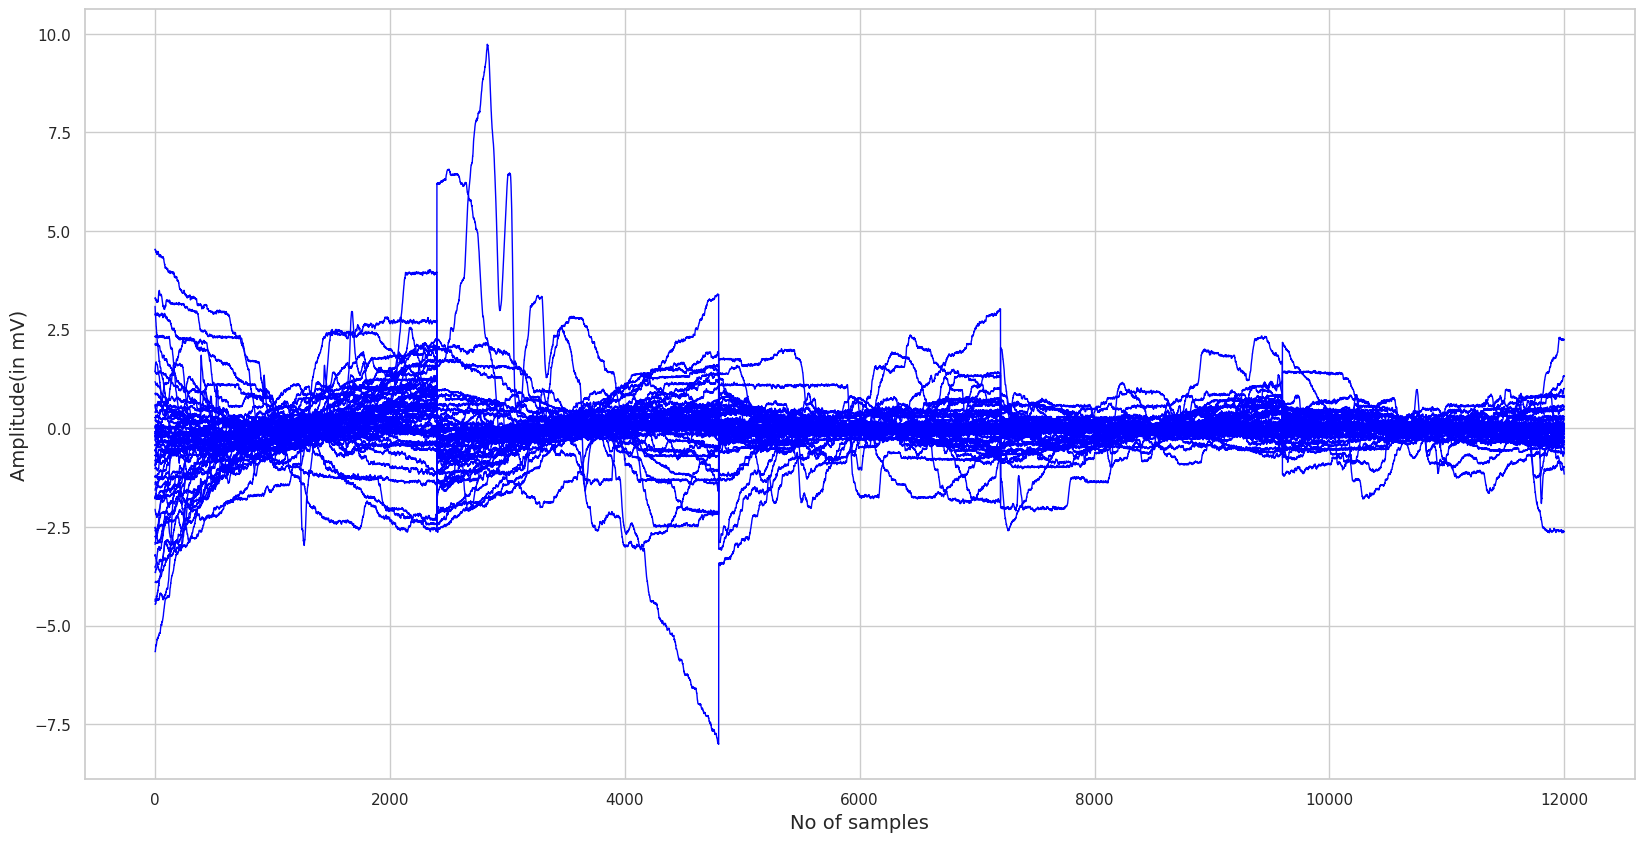

In [17]:
plot_data(deviation_player,'deviation_performer.eps')
plot_data(deviation_nonplayer,'deviation_nonperformer.eps')

In [ ]:
plot_data(deviation_pre_P,'deviation_pre_P_new.jpg')
plot_data(deviation_post_P,'deviation_post_P_new.jpg')
plot_data(deviation_pre_NP,'deviation_pre_NP_new.jpg')
plot_data(deviation_post_NP,'deviation_post_NP_new.jpg')

# CSV OF MEANS (190)****

In [ ]:
def median_of_means(LH_all_pre_P, RH_all_pre_P):

    combined_data = np.concatenate((LH_all_pre_P, RH_all_pre_P), axis=0)

    #Number of states (columns)

    num_states = combined_data.shape[2] # Assuming 5 states as columns 
    means_per_state = []

    # Calculate mean of each column in each 2D array

    for state in range(num_states): 
        means_for_state = []

        for matrix in combined_data: 
            means_for_state.append(np.mean(matrix[:, state])) # Mean of each column for state 
        means_per_state.append(means_for_state)

    return means_per_state

In [ ]:
# x=median_of_means(LH_all_pre_P, RH_all_pre_P)
# (np.array(x)).tofile('p_pre.csv', sep=',')
# x=median_of_means(LH_all_post_P, RH_all_post_P)
# (np.array(x)).tofile('p_post.csv', sep=',')
# x=median_of_means(LH_all_post_NP, RH_all_post_NP)
# (np.array(x)).tofile('np_post.csv', sep=',')
# x=median_of_means(LH_all_pre_NP, RH_all_pre_NP)
# (np.array(x)).tofile('np_pre.csv', sep=',')

# CSV OF STDS****

In [ ]:
def median_of_stds(LH_all_pre_P, RH_all_pre_P):

    combined_data = np.concatenate((LH_all_pre_P, RH_all_pre_P), axis=0)

    #Number of states (columns)

    num_states = combined_data.shape[2] # Assuming 5 states as columns 
    means_per_state = []

    # Calculate mean of each column in each 2D array

    for state in range(num_states): 
        means_for_state = []

        for matrix in combined_data: 
            means_for_state.append(np.std(matrix[:, state])) # Mean of each column for state 
        means_per_state.append(means_for_state)

    return means_per_state

In [ ]:
# x=median_of_stds(LH_all_pre_P, RH_all_pre_P)
# (np.array(x)).tofile('p_pre_std.csv', sep=',')
# x=median_of_stds(LH_all_post_P, RH_all_post_P)
# (np.array(x)).tofile('p_post_std.csv', sep=',')
# x=median_of_stds(LH_all_post_NP, RH_all_post_NP)
# (np.array(x)).tofile('np_post_std.csv', sep=',')
# x=median_of_stds(LH_all_pre_NP, RH_all_pre_NP)
# (np.array(x)).tofile('np_pre_std.csv', sep=',')

# BOX PLOTS OF MEAN****

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erfcinv

def plot_median_of_mean(LH_all_pre_P, RH_all_pre_P, save_path):
    combined_data = np.concatenate((LH_all_pre_P, RH_all_pre_P), axis=0)
    
    # Number of states (columns)
    num_states = combined_data.shape[2]  # Assuming states are represented as columns
    stds_per_state = []

    # Calculate standard deviation of each column in each 2D array for each state
    for state in range(num_states): 
        stds_for_state = []
        for matrix in combined_data: 
            stds_for_state.append(np.mean(matrix[:, state]))  # Standard deviation for each state
        stds_per_state.append(stds_for_state)

    # Prepare data for boxplot
    data_for_boxplot = [stds_per_state[state] for state in range(num_states)]

    # Calculate outliers based on scaled MAD
    c = -1 / (np.sqrt(2) * erfcinv(3 / 2))  # Scaling constant
    outliers_per_state = []
    
    for state_data in data_for_boxplot:
        median = np.median(state_data)
        mad = np.median(np.abs(state_data - median))  # Median Absolute Deviation
        scaled_mad = c * mad
        
        lower_bound = median - 3 * scaled_mad
        upper_bound = median + 3 * scaled_mad
        
        # Store the outliers for each state, excluding those within the range (-16, 12) as normal
        outliers = [
            x for x in state_data 
            if (x < lower_bound or x > upper_bound)
        ]
        outliers_per_state.append(outliers)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_for_boxplot, flierprops=dict(marker='+', markersize=10), whis=[0, 100])  # Include all data points
#     sns.boxplot(data=data_for_boxplot, flierprops=dict(marker='+', markersize=10))
    
    # Manually plot outliers calculated above
    for state in range(num_states):
        plt.scatter([state] * len(outliers_per_state[state]), outliers_per_state[state], color='red', label='Outliers' if state == 0 else "", marker='o')

    plt.xticks(ticks=np.arange(num_states), labels=[f'State {i+1}' for i in range(num_states)])
    plt.ylabel('Mean')
    plt.grid(True)
    plt.ylim(-16, 12)
    plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()






In [ ]:
plot_median_of_mean(LH_all_pre_P, RH_all_pre_P, 'mean_pre_P_new.jpg')
plot_median_of_mean(LH_all_post_P, RH_all_post_P, 'mean_post_P_new.jpg')
plot_median_of_mean(LH_all_post_NP, RH_all_post_NP, 'mean_post_NP_new.jpg')
plot_median_of_mean(LH_all_pre_NP, RH_all_pre_NP, 'mean_pre_NP_new.jpg')

# BOX PLOTS OF STDS****

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erfcinv

def plot_median_of_std(LH_all_pre_P, RH_all_pre_P, save_path):
    combined_data = np.concatenate((LH_all_pre_P, RH_all_pre_P), axis=0)
    
    # Number of states (columns)
    num_states = combined_data.shape[2]  # Assuming states are represented as columns
    stds_per_state = []

    # Calculate standard deviation of each column in each 2D array for each state
    for state in range(num_states): 
        stds_for_state = []
        for matrix in combined_data: 
            stds_for_state.append(np.std(matrix[:, state]))  # Standard deviation for each state
        stds_per_state.append(stds_for_state)

    # Prepare data for boxplot
    data_for_boxplot = [stds_per_state[state] for state in range(num_states)]

    # Calculate outliers based on scaled MAD
    c = -1 / (np.sqrt(2) * erfcinv(3 / 2))  # Scaling constant
    outliers_per_state = []
    
    for state_data in data_for_boxplot:
        median = np.median(state_data)
        mad = np.median(np.abs(state_data - median))  # Median Absolute Deviation
        scaled_mad = c * mad
        
        lower_bound = median - 3 * scaled_mad
        upper_bound = median + 3 * scaled_mad
        
        # Store the outliers for each state
        outliers = [x for x in state_data if x < lower_bound or x > upper_bound]
        outliers_per_state.append(outliers)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_for_boxplot, flierprops=dict(marker='+', markersize=10))
    
    # Manually plot outliers calculated above
#     for state in range(num_states):
#         plt.scatter([state] * len(outliers_per_state[state]), outliers_per_state[state], label='Outliers' if state == 0 else "")

    plt.xticks(ticks=np.arange(num_states), labels=[f'State {i+1}' for i in range(num_states)])
    plt.ylabel('SD')
    plt.grid(True)
    plt.ylim(0, 5)
    plt.savefig(save_path, format='jpg', dpi=300)  # Save the figure
    plt.show()


In [ ]:
plot_median_of_std(LH_all_pre_P, RH_all_pre_P, 'std_pre_P_new.jpg')
plot_median_of_std(LH_all_pre_NP, RH_all_pre_NP, 'std_pre_NP_new.jpg')
plot_median_of_std(LH_all_post_P, RH_all_post_P, 'std_post_P_new.jpg')
plot_median_of_std(LH_all_post_NP, RH_all_post_NP, 'std_post_NP_new.jpg')

# SELECTED LINES PLOTTING****

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Function to plot based on selected lines
# def plot_selected_lines(matrix, selected_lines):
#     matrix = np.array(matrix)
#     plt.figure(figsize=(10, 5))
    
#     for i in selected_lines:
#         plt.plot(matrix[i, :], label=f'Line {i+1}')
    
#     plt.title('Selected Lines')
#     plt.xlabel('X-axis')
#     plt.ylabel('Y-axis')
#     plt.legend()
#     plt.show()





In [ ]:
# Initial plot of all lines
# plot_selected_lines(matrix, list(range(matrix.shape[0])))

# # Loop to allow user to select lines until they wish to stop
# while True:
#     # Simulating user input for line selection
#     selected_lines = input("Enter the indices of lines to plot (e.g., 0, 2, 3): ")
#     selected_lines = [int(i) for i in selected_lines.split(",")]
    
#     # Re-plot based on user selection
#     plot_selected_lines(matrix, selected_lines)
    
#     # Ask the user if they wish to continue
#     continue_plotting = input("Do you wish to continue? (yes/no): ").strip().lower()
    
#     # Check if user input means 'no', if yes, break the loop
#     if continue_plotting in ['no', 'n']:
#         print("Exiting plotting.")
#         break

In [ ]:
# flattened_LH_all_pre_P= flatten_3d_to_2d_col(LH_all_pre_P)
# plot_selected_lines(flattened_LH_all_pre_P, list(range(flattened_LH_all_pre_P.shape[0])))
# while True:
#     selected_lines = input("Enter the indices of lines to plot (e.g., 0, 2, 3): ")
#     selected_lines = [int(i) for i in selected_lines.split(",")]
#     plot_selected_lines(flattened_LH_all_pre_P, selected_lines)
#     continue_plotting = input("Do you wish to continue? (yes/no): ").strip().lower()

#     # Check if user input means 'no', if yes, break the loop
#     if continue_plotting in ['no', 'n']:
#         print("Exiting plotting.")
#         break

        
# plot_selected_lines(flattened_LH_all_pre_P)

# NEXT ...****

In [ ]:
import numpy as np

# Function to calculate mean and standard deviation for 1D arrays
def calculate_stats(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    return mean, std

# Function to divide a 1D array into sets of 200 points and calculate stats for each set
def segment_stats(arr, segment_size=200):
    segments = [arr[i:i+segment_size] for i in range(0, len(arr), segment_size)]
    stats = [calculate_stats(segment) for segment in segments if len(segment) == segment_size]
    return stats

# Compute mean and standard deviation for each 1D array
overall_stats_LH_all_pre_P = [calculate_stats(row) for row in flattened_LH_all_pre_P]
overall_stats_LH_all_post_P = [calculate_stats(row) for row in flattened_LH_all_post_P]
overall_stats_RH_all_pre_P = [calculate_stats(row) for row in flattened_RH_all_pre_P]
overall_stats_RH_all_post_P = [calculate_stats(row) for row in flattened_RH_all_post_P]

overall_stats_LH_all_pre_NP = [calculate_stats(row) for row in flattened_LH_all_pre_NP]
overall_stats_LH_all_post_NP = [calculate_stats(row) for row in flattened_LH_all_post_NP]
overall_stats_RH_all_pre_NP = [calculate_stats(row) for row in flattened_RH_all_pre_NP]
overall_stats_RH_all_post_NP = [calculate_stats(row) for row in flattened_RH_all_post_NP]

# Define a function to normalize the array using mean and std
def normalize_array(arr, mean, std):
    return (arr - mean) / std

# Normalize the flattened arrays by using the calculated stats
normalized_LH_all_pre_P = [
    normalize_array(row, *overall_stats_LH_all_pre_P[i]) for i, row in enumerate(flattened_LH_all_pre_P)
]
normalized_LH_all_post_P = [
    normalize_array(row, *overall_stats_LH_all_post_P[i]) for i, row in enumerate(flattened_LH_all_post_P)
]
normalized_RH_all_pre_P = [
    normalize_array(row, *overall_stats_RH_all_pre_P[i]) for i, row in enumerate(flattened_RH_all_pre_P)
]
normalized_RH_all_post_P = [
    normalize_array(row, *overall_stats_RH_all_post_P[i]) for i, row in enumerate(flattened_RH_all_post_P)
]

normalized_LH_all_pre_NP = [
    normalize_array(row, *overall_stats_LH_all_pre_NP[i]) for i, row in enumerate(flattened_LH_all_pre_NP)
]
normalized_LH_all_post_NP = [
    normalize_array(row, *overall_stats_LH_all_post_NP[i]) for i, row in enumerate(flattened_LH_all_post_NP)
]
normalized_RH_all_pre_NP = [
    normalize_array(row, *overall_stats_RH_all_pre_NP[i]) for i, row in enumerate(flattened_RH_all_pre_NP)
]
normalized_RH_all_post_NP = [
    normalize_array(row, *overall_stats_RH_all_post_NP[i]) for i, row in enumerate(flattened_RH_all_post_NP)
]


# Compute segment-wise stats for each 1D array
segmented_LH_all_pre_P = [segment_stats(row) for row in flattened_LH_all_pre_P]
segmented_LH_all_post_P = [segment_stats(row) for row in flattened_LH_all_post_P]
segmented_RH_all_pre_P = [segment_stats(row) for row in flattened_RH_all_pre_P]
segmented_RH_all_post_P = [segment_stats(row) for row in flattened_RH_all_post_P]

segmented_LH_all_pre_NP = [segment_stats(row) for row in flattened_LH_all_pre_NP]
segmented_LH_all_post_NP = [segment_stats(row) for row in flattened_LH_all_post_NP]
segmented_RH_all_pre_NP = [segment_stats(row) for row in flattened_RH_all_pre_NP]
segmented_RH_all_post_NP = [segment_stats(row) for row in flattened_RH_all_post_NP]

def divide_into_segments(arr, segment_size=200):
    # Split the array into segments of the specified size
    segments = [arr[i:i+segment_size] for i in range(0, len(arr), segment_size)]
    return segments

# Normalize segments for each row in the 2D array
segments_LH_all_pre_P = [
    divide_into_segments(row)
    for idx, row in enumerate(flattened_LH_all_pre_P)
]
segments_LH_all_post_P = [
    divide_into_segments(row)
    for idx, row in enumerate(flattened_LH_all_post_P)
]
segments_RH_all_pre_P = [
    divide_into_segments(row)
    for idx, row in enumerate(flattened_RH_all_pre_P)
]
segments_RH_all_post_P = [
    divide_into_segments(row)
    for idx, row in enumerate(flattened_RH_all_post_P)
]

segments_LH_all_pre_NP = [
    divide_into_segments(row)
    for idx, row in enumerate(flattened_LH_all_pre_NP)
]
segments_LH_all_post_NP = [
    divide_into_segments(row)
    for idx, row in enumerate(flattened_LH_all_post_NP)
]
segments_RH_all_pre_NP = [
    divide_into_segments(row)
    for idx, row in enumerate(flattened_RH_all_pre_NP)
]
segments_RH_all_post_NP = [
    divide_into_segments(row)
    for idx, row in enumerate(flattened_RH_all_post_NP)
]




In [ ]:
from scipy.stats import skew, kurtosis
import numpy as np

# Function to calculate desired statistics for a single segment
def calculate_extended_stats(segment):
    # Convert the segment to a numeric type (float) to avoid object type issues
    segment = np.asarray(segment, dtype=np.float64)
    
    # Handle any NaN values appropriately using nan_policy='omit'
    mean = np.nanmean(segment)  # Use nanmean to ignore NaN values
    std = np.nanstd(segment)    # Use nanstd to ignore NaN values
    var = np.nanvar(segment)    # Use nanvar to ignore NaN values
    skewness = skew(segment, nan_policy='omit')  # Omit NaN values in skew calculation
    kurt = kurtosis(segment, nan_policy='omit')  # Omit NaN values in kurtosis calculation
    
    return mean, std, var, skewness, kurt

# Calculate statistics for all rows
def calculate_row_stats(normalized_row_segments):
    row_stats = [calculate_extended_stats(segment) for segment in normalized_row_segments]
    return row_stats

# Example calculation for all rows (you will use your actual segments here)
all_rows_stats_LH_pre_P = [
    calculate_row_stats(row) for row in segments_LH_all_pre_P
]
all_rows_stats_LH_post_P = [
    calculate_row_stats(row) for row in segments_LH_all_post_P
]
all_rows_stats_RH_pre_P = [
    calculate_row_stats(row) for row in segments_RH_all_pre_P
]
all_rows_stats_RH_post_P = [
    calculate_row_stats(row) for row in segments_RH_all_post_P
]

all_rows_stats_LH_pre_NP = [
    calculate_row_stats(row) for row in segments_LH_all_pre_NP
]
all_rows_stats_LH_post_NP = [
    calculate_row_stats(row) for row in segments_LH_all_post_NP
]
all_rows_stats_RH_pre_NP = [
    calculate_row_stats(row) for row in segments_RH_all_pre_NP
]
all_rows_stats_RH_post_NP = [
    calculate_row_stats(row) for row in segments_RH_all_post_NP
]


In [ ]:
import csv

# Prepare header for the CSV file
header = ["Row", "Mean", "Std", "Variance", "Skewness", "Kurtosis", "resp"]

# Create a function to format the data into rows for CSV writing
def format_stats_for_csv(stats, resp_label):
    csv_rows = []
    for row_index, row_stats in enumerate(stats):
        for segment_index, (mean, std, var, skewness, kurt) in enumerate(row_stats):
            csv_rows.append([segment_index + 1, mean, std, var, skewness, kurt, resp_label])
    return csv_rows

# Prepare the data for CSV by formatting all rows for each dataset
csv_data = []

# Append data for each dataset
csv_data += format_stats_for_csv(all_rows_stats_LH_pre_P, "lh pre p")
csv_data += format_stats_for_csv(all_rows_stats_LH_post_P, "lh post p")
csv_data += format_stats_for_csv(all_rows_stats_RH_pre_P, "rh pre p")
csv_data += format_stats_for_csv(all_rows_stats_RH_post_P, "rh post p")

csv_data += format_stats_for_csv(all_rows_stats_LH_pre_NP, "lh pre np")
csv_data += format_stats_for_csv(all_rows_stats_LH_post_NP, "lh post np")
csv_data += format_stats_for_csv(all_rows_stats_RH_pre_NP, "rh pre np")
csv_data += format_stats_for_csv(all_rows_stats_RH_post_NP, "rh post np")

# Write the data to a CSV file
def write_stats_to_csv(csv_data, filename='stats_output.csv'):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)  # Writing the header row
        writer.writerows(csv_data)  # Writing the data rows
    print(f"CSV file '{filename}' has been created.")

# Write to the CSV
write_stats_to_csv(csv_data)


In [ ]:
import csv

# Prepare data for CSV
csv_data = [["Row", "Segment", "Mean", "Std", "Variance", "Skewness", "Kurtosis", "resp"]]

# Define the mapping for each stats list to the corresponding "resp" value
stats_to_resp = {
    "all_rows_stats_LH_pre_P": "LH pre Player",
    "all_rows_stats_LH_post_P": "LH post Player",
    "all_rows_stats_RH_pre_P": "RH pre Player",
    "all_rows_stats_RH_post_P": "RH post Player",
    "all_rows_stats_LH_pre_NP": "LH pre Non-Player",
    "all_rows_stats_LH_post_NP": "LH post Non-Player",
    "all_rows_stats_RH_pre_NP": "RH pre Non-Player",
    "all_rows_stats_RH_post_NP": "RH post Non-Player"
}

# Define all your stats datasets here
all_stats_dict = {
    "all_rows_stats_LH_pre_P": all_rows_stats_LH_pre_P,
    "all_rows_stats_LH_post_P": all_rows_stats_LH_post_P,
    "all_rows_stats_RH_pre_P": all_rows_stats_RH_pre_P,
    "all_rows_stats_RH_post_P": all_rows_stats_RH_post_P,
    "all_rows_stats_LH_pre_NP": all_rows_stats_LH_pre_NP,
    "all_rows_stats_LH_post_NP": all_rows_stats_LH_post_NP,
    "all_rows_stats_RH_pre_NP": all_rows_stats_RH_pre_NP,
    "all_rows_stats_RH_post_NP": all_rows_stats_RH_post_NP
}

# Loop through each dataset and add the corresponding "resp"
for stats_name, stats_data in all_stats_dict.items():
    resp_value = stats_to_resp[stats_name]
    
    # Add data to csv_data with the 'resp' column
    for row_idx, row_stats in enumerate(stats_data):
        for seg_idx, stats in enumerate(row_stats):
            csv_data.append([row_idx + 1, seg_idx + 1] + list(stats) + [resp_value])

# Write to CSV
output_csv_path = "stats_with_all_resps.csv"
with open(output_csv_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)

print(f"CSV file saved to {output_csv_path}")


In [ ]:



import pandas as pd

# Mapping of row numbers to sub-codes
row_to_subcode = {
    1: "S041", 2: "S041", 3: "S046", 4: "S045", 5: "SO44",
    6: "S041", 7: "S042", 8: "SO49", 9: "S057", 10: "SO53",
    11: "S055", 12: "SO54", 13: "S058", 14: "S064"
}

# Load the CSV file
input_csv_path = "LH_all_pre_stats.csv"
df = pd.read_csv(input_csv_path)

# We assume 60 segments per row. We will replace 'Row' column values in sets of 60
sub_codes = []

# Iterate through the rows in chunks of 60
for i in range(0, len(df), 60):
    # Find the sub-code for the current row's group
    row_num = (i // 60) + 1  # Determine the row number based on chunk position
    sub_code = row_to_subcode.get(row_num, "Unknown")
    
    # For each 60-row block, assign the corresponding sub-code
    sub_codes.extend([sub_code] * 60)

# Replace the 'Row' column with the sub-codes for the entire chunk
df['Sub-Code'] = sub_codes
df['resp'] = "LH pre Player"

# Drop the original 'Row' column
df.drop(columns=['Row'], inplace=True)

# Save the updated CSV
output_csv_path = "LH_all_pre_stats_with_subcodes.csv"
df.to_csv(output_csv_path, index=False)




In [ ]:
num_rows = len(all_rows_stats)  # Number of rows
num_segments_per_row = [len(row) for row in all_rows_stats]  # Number of segments per row

print("Shape of normalized_segments_LH_all_pre:")
print(f"Rows: {num_rows}")
print(f"Segments per row: {num_segments_per_row}")

In [ ]:
import numpy as np

# Function to divide each row into 5 sets of 200 points each
def divide_into_sets(array, num_sets=5, points_per_set=2400):
    # Check that each row has the correct number of points (num_sets * points_per_set)
    if array.shape[1] != num_sets * points_per_set:
        raise ValueError(f"Each row must have {num_sets * points_per_set} points to divide into {num_sets} sets of {points_per_set} points.")
    
    # Split each row into the specified number of sets
    sets = []
    for row in array:
        row_sets = np.split(row, num_sets)
        sets.append(row_sets)
    
    return np.array(sets)

# Combine arrays row-wise
combined_LH_RH_pre_P = np.vstack((flattened_LH_all_pre_P, flattened_RH_all_pre_P))
combined_LH_RH_pre_NP = np.vstack((flattened_LH_all_pre_NP, flattened_RH_all_pre_NP))
combined_LH_RH_post_P = np.vstack((flattened_LH_all_post_P, flattened_RH_all_post_P))
combined_LH_RH_post_NP = np.vstack((flattened_LH_all_post_NP, flattened_RH_all_post_NP))


# Divide each row into 5 sets of 2400 points each
data_pre_P = divide_into_sets(combined_LH_RH_pre_P)
data_pre_NP = divide_into_sets(combined_LH_RH_pre_NP)
data_post_P = divide_into_sets(combined_LH_RH_post_P)
data_post_NP = divide_into_sets(combined_LH_RH_post_NP)


In [ ]:
combined_LH_RH_pre_P.shape

In [ ]:
import numpy as np

def zci_and_m(data):
    """
    Calculate zero-crossing index (zci) and slope (m) for subsets of 2400 points
    for each row in the input data.

    Parameters:
        data (numpy.ndarray): Input data with dimensions (num_rows, num_columns).

    Returns:
        zci_all (numpy.ndarray): Zero-crossing indices for all subsets and rows.
        m_all (numpy.ndarray): Slopes for all subsets and rows.
    """
    num_rows, num_columns = data.shape
    if num_columns % 2400 != 0:
        raise ValueError("Number of columns in each row must be divisible by 2400.")
    
    # Number of subsets per row
    num_subsets = num_columns // 2400

    # Initialize results
    zci_all = np.zeros((num_rows, num_subsets))
    m_all = np.zeros((num_rows, num_subsets))
    
    # Process each row
    for row_idx in range(num_rows):
        for subset_idx in range(num_subsets):
            # Extract the subset for the current row
            start_idx = subset_idx * 2400
            end_idx = start_idx + 2400
            subset = data[row_idx, start_idx:end_idx]
            
            # Normalize data by subtracting the mean
            db_data = subset - np.mean(subset)
            
            # Find the sign of the db_data values
            sgn = np.sign(db_data)
            zero_crossings = []
            
            # Detect zero-crossings
            for i in range(1, db_data.shape[0]):
                if sgn[i] != sgn[i-1]:
                    zero_crossings.append(i)
            
            # Find the crossing closest to the center
            if zero_crossings:
                ix = np.argmin(np.abs(np.array(zero_crossings) - 2400 / 2))
                zci_all[row_idx, subset_idx] = zero_crossings[ix]
                
                # Calculate the numerator and denominator for slope
                nu = (np.arange(2400) - zero_crossings[ix]) * db_data
                dn = (np.arange(2400) - zero_crossings[ix]) ** 2
                
                # Compute slope
                m_all[row_idx, subset_idx] = np.sum(nu) / np.sum(dn)
    
    # Normalize zci and scale m
    zci_all /= 1200
    m_all *= 1200
    
    return zci_all, m_all


In [ ]:
zci_m_results = {}

# Compute zci and m for each combined dataset
zci_m_results['LH_pre_P'] = zci_and_m(flattened_LH_all_pre_P)
zci_m_results['RH_pre_P'] = zci_and_m(flattened_RH_all_pre_P)
zci_m_results['LH_pre_NP'] = zci_and_m(flattened_LH_all_pre_NP)
zci_m_results['RH_pre_NP'] = zci_and_m(flattened_RH_all_pre_NP)
zci_m_results['LH_post_P'] = zci_and_m(flattened_LH_all_post_P)
zci_m_results['RH_post_P'] = zci_and_m(flattened_RH_all_post_P)
zci_m_results['LH_post_NP'] = zci_and_m(flattened_LH_all_post_NP)
zci_m_results['RH_post_NP'] = zci_and_m(flattened_RH_all_post_NP)

# Assign results to variables for clarity
zci_LH_pre_P, m_LH_pre_P = zci_m_results['LH_pre_P']
zci_RH_pre_P, m_RH_pre_P = zci_m_results['RH_pre_P']
zci_LH_pre_NP, m_LH_pre_NP = zci_m_results['LH_pre_NP']
zci_RH_pre_NP, m_RH_pre_NP = zci_m_results['RH_pre_NP']
zci_LH_post_P, m_LH_post_P = zci_m_results['LH_post_P']
zci_RH_post_P, m_RH_post_P = zci_m_results['RH_post_P']
zci_LH_post_NP, m_LH_post_NP = zci_m_results['LH_post_NP']
zci_RH_post_NP, m_RH_post_NP = zci_m_results['RH_post_NP']

In [ ]:
import numpy as np
import csv

# Path to the CSV file located in Kaggle's output directory
csv_file_path = '/kaggle/working/stats_output.csv'



# Function to repeat the zci and m values for each dataset
def repeat_values(values):
    # Repeat each value in the set (axis=1 is for repeating along columns)
    return np.repeat(values, 12, axis=1)

# Repeat the zci and m values for all datasets
zci_LH_pre_P_repeated = repeat_values(zci_LH_pre_P)
zci_RH_pre_P_repeated = repeat_values(zci_RH_pre_P)
zci_LH_pre_NP_repeated = repeat_values(zci_LH_pre_NP)
zci_RH_pre_NP_repeated = repeat_values(zci_RH_pre_NP)
zci_LH_post_P_repeated = repeat_values(zci_LH_post_P)
zci_RH_post_P_repeated = repeat_values(zci_RH_post_P)
zci_LH_post_NP_repeated = repeat_values(zci_LH_post_NP)
zci_RH_post_NP_repeated = repeat_values(zci_RH_post_NP)

m_LH_pre_P_repeated = repeat_values(m_LH_pre_P)
m_RH_pre_P_repeated = repeat_values(m_RH_pre_P)
m_LH_pre_NP_repeated = repeat_values(m_LH_pre_NP)
m_RH_pre_NP_repeated = repeat_values(m_RH_pre_NP)
m_LH_post_P_repeated = repeat_values(m_LH_post_P)
m_RH_post_P_repeated = repeat_values(m_RH_post_P)
m_LH_post_NP_repeated = repeat_values(m_LH_post_NP)
m_RH_post_NP_repeated = repeat_values(m_RH_post_NP)

# Combine the repeated zci and m values into single lists (all values under one column)
zci_values = np.concatenate([zci_LH_pre_P_repeated.flatten(), zci_RH_pre_P_repeated.flatten(),
                             zci_LH_pre_NP_repeated.flatten(), zci_RH_pre_NP_repeated.flatten(),
                             zci_LH_post_P_repeated.flatten(), zci_RH_post_P_repeated.flatten(),
                             zci_LH_post_NP_repeated.flatten(), zci_RH_post_NP_repeated.flatten()])

m_values = np.concatenate([m_LH_pre_P_repeated.flatten(), m_RH_pre_P_repeated.flatten(),
                           m_LH_pre_NP_repeated.flatten(), m_RH_pre_NP_repeated.flatten(),
                           m_LH_post_P_repeated.flatten(), m_RH_post_P_repeated.flatten(),
                           m_LH_post_NP_repeated.flatten(), m_RH_post_NP_repeated.flatten()])

# Function to append the zci and m values to the existing CSV file
def append_zci_m_to_csv(zci_values, m_values, filename=csv_file_path):
    # Read the existing rows of the CSV first
    with open(filename, 'r', newline='') as read_file:
        reader = csv.reader(read_file)
        rows = list(reader)

    # Ensure the number of zci and m values match the number of rows in the CSV
    num_rows_in_csv = len(rows) - 1  # excluding the header row
    total_values_in_flat = len(zci_values)  # Length of flattened arrays

    if num_rows_in_csv != total_values_in_flat:
        raise ValueError(f"Number of rows in CSV does not match the number of zci and m values. "
                         f"CSV rows: {num_rows_in_csv}, zci values: {total_values_in_flat}")

    # Now iterate and append zci and m values to the respective columns
    index = 0
    for i in range(1, len(rows)):  # Skip header row
        # If the index exceeds the number of available zci and m values, skip appending
        if index < len(zci_values):
            zci = zci_values[index]
            m = m_values[index]
            rows[i].append(zci)  # Append zci value
            rows[i].append(m)    # Append m value
        index += 1
        if index >= total_values_in_flat:
            break  # Prevent out of bounds access if index exceeds flattened array size

    # Write the modified rows back into the file
    with open(filename, 'w', newline='') as write_file:
        writer = csv.writer(write_file)
        rows[0].extend(["zci", "m"]) 
        writer.writerows(rows)

    print(f"zci and m values have been appended to '{filename}'.")

# Call the function to append to the existing CSV
append_zci_m_to_csv(zci_values, m_values)


In [ ]:
import numpy as np
from scipy.signal import welch
def pow2db(power):
    return 10 * np.log10(power)

def mnf_and_pmnf(data, fs):
    """
    Calculate Mean Frequency (MNF) for subsets of 2400 points for each row in the input data.

    Parameters:
        data (numpy.ndarray): Input data with dimensions (num_rows, num_columns).
        fs (float): Sampling frequency.

    Returns:
        mnf_all (numpy.ndarray): Mean frequency values for all subsets and rows.
    """
    data = np.array(data)
    num_rows, num_columns = data.shape
    if num_columns % 200 != 0:
        raise ValueError("Number of columns in each row must be divisible by 2400.")
    
    # Number of subsets per row
    num_subsets = num_columns // 200

    # Initialize results
    mnf_all = np.zeros((num_rows, num_subsets))
    pmnf_all = np.zeros((num_rows, num_subsets))
    
    
    # Process each row
    for row_idx in range(data.shape[0]):
        for subset_idx in range(num_subsets):  # 5 subsets
            start_idx = subset_idx * 200
            end_idx = start_idx + 200
            subset = data[row_idx, start_idx:end_idx]
            
            # Initialize variables for power and frequency calculation
        # Initialize variables for power and frequency calculation
            total_power_real = 0.0
            total_power_imag = 0.0
            freq_weighted_power_real = 0.0
            freq_weighted_power_imag = 0.0
            
            # Calculate Power Spectral Density (PSD) using Welch's method
            f, pxx = welch(subset, fs, nperseg=200, noverlap=0, nfft=200)
    
            # Perform calculations on real and imaginary parts of PSD
            pxx_real = np.real(pxx)
            pxx_imag = np.imag(pxx)
    
            # Calculate total power (separate real and imaginary sums)
            total_power_real = np.sum(pxx_real)
            total_power_imag = np.sum(pxx_imag)

        # Calculate frequency * power and sum it for both real and imaginary parts
            for i in range(len(f)):
                freq_weighted_power_real += f[i] * pxx_real[i]
                freq_weighted_power_imag += f[i] * pxx_imag[i]
            
            # Avoid division by zero and calculate Mean Frequency (MNF)
            if (total_power_real + total_power_imag) != 0:
                mnf = (freq_weighted_power_real + 1j * freq_weighted_power_imag) / (total_power_real + 1j * total_power_imag)
                # Store only the real part of MNF (or real + imaginary parts if needed)
                mnf_all[row_idx, subset_idx] = np.real(mnf)  # Store only real part
            total_power = np.sqrt(total_power_real**2 + total_power_imag**2)
            pmnf_all[row_idx, subset_idx] = pow2db(total_power)

    
    return mnf_all,pmnf_all


In [ ]:
mnf_pmnf_results = {}
fs=50

# Compute zci and m for each combined dataset
mnf_pmnf_results['LH_pre_P'] = mnf_and_pmnf(normalized_LH_all_pre_P,fs)
mnf_pmnf_results['RH_pre_P'] = mnf_and_pmnf(normalized_RH_all_pre_P,fs)
mnf_pmnf_results['LH_pre_NP'] = mnf_and_pmnf(normalized_LH_all_pre_NP,fs)
mnf_pmnf_results['RH_pre_NP'] = mnf_and_pmnf(normalized_RH_all_pre_NP,fs)
mnf_pmnf_results['LH_post_P'] = mnf_and_pmnf(normalized_LH_all_post_P,fs)
mnf_pmnf_results['RH_post_P'] = mnf_and_pmnf(normalized_RH_all_post_P,fs)
mnf_pmnf_results['LH_post_NP'] = mnf_and_pmnf(normalized_LH_all_post_NP,fs)
mnf_pmnf_results['RH_post_NP'] = mnf_and_pmnf(normalized_RH_all_post_NP,fs)

# Assign results to variables for clarity
mnf_LH_pre_P, pmnf_LH_pre_P = mnf_pmnf_results['LH_pre_P']
mnf_RH_pre_P, pmnf_RH_pre_P = mnf_pmnf_results['RH_pre_P']
mnf_LH_pre_NP, pmnf_LH_pre_NP = mnf_pmnf_results['LH_pre_NP']
mnf_RH_pre_NP, pmnf_RH_pre_NP = mnf_pmnf_results['RH_pre_NP']
mnf_LH_post_P, pmnf_LH_post_P = mnf_pmnf_results['LH_post_P']
mnf_RH_post_P, pmnf_RH_post_P = mnf_pmnf_results['RH_post_P']
mnf_LH_post_NP, pmnf_LH_post_NP = mnf_pmnf_results['LH_post_NP']
mnf_RH_post_NP, pmnf_RH_post_NP = mnf_pmnf_results['RH_post_NP']




In [ ]:
import numpy as np
import csv

# Path to the CSV file located in Kaggle's output directory
csv_file_path = '/kaggle/working/stats_output.csv'

# Function to append the mnf and pmnf values to the existing CSV file
def append_mnf_pmnf_to_csv(mnf_values, pmnf_values, filename=csv_file_path):
    # Read the existing rows of the CSV first
    with open(filename, 'r', newline='') as read_file:
        reader = csv.reader(read_file)
        rows = list(reader)

    # Ensure the number of mnf and pmnf values match the number of rows in the CSV
    num_rows_in_csv = len(rows) - 1  # excluding the header row
    total_values_in_flat = len(mnf_values)  # Length of flattened arrays


    # Now iterate and append mnf and pmnf values to the respective columns
    index = 0
    for i in range(1, len(rows)):  # Skip header row
        # If the index exceeds the number of available mnf and pmnf values, skip appending
        if index < len(mnf_values):
            mnf = mnf_values[index]
            pmnf = pmnf_values[index]
            rows[i].append(mnf)  # Append mnf value
            rows[i].append(pmnf)  # Append pmnf value
        index += 1
        if index >= total_values_in_flat:
            break  # Prevent out of bounds access if index exceeds flattened array size

    # Write the modified rows back into the file
    with open(filename, 'w', newline='') as write_file:
        writer = csv.writer(write_file)
        # Write the header first
        rows[0].extend(["mnf", "pmnf"])  # Add the "mnf" and "pmnf" columns to the header
        writer.writerows(rows)

    print(f"mnf and pmnf values have been appended to '{filename}'.")

# Combine the mnf and pmnf values into single lists (flattened arrays)
mnf_values = np.concatenate([mnf_LH_pre_P.flatten(), mnf_RH_pre_P.flatten(),
                             mnf_LH_pre_NP.flatten(), mnf_RH_pre_NP.flatten(),
                             mnf_LH_post_P.flatten(), mnf_RH_post_P.flatten(),
                             mnf_LH_post_NP.flatten(), mnf_RH_post_NP.flatten()])

pmnf_values = np.concatenate([pmnf_LH_pre_P.flatten(), pmnf_RH_pre_P.flatten(),
                              pmnf_LH_pre_NP.flatten(), pmnf_RH_pre_NP.flatten(),
                              pmnf_LH_post_P.flatten(), pmnf_RH_post_P.flatten(),
                              pmnf_LH_post_NP.flatten(), pmnf_RH_post_NP.flatten()])

# Call the function to append to the existing CSV
append_mnf_pmnf_to_csv(mnf_values, pmnf_values)


In [ ]:
import numpy as np
from scipy.signal import welch



def medfreq(pxx, f):
    """
    Calculate the median frequency from the power spectral density (PSD).
    
    Parameters:
        pxx (numpy.ndarray): Power spectral density (may contain complex values).
        f (numpy.ndarray): Frequency bins corresponding to the PSD (may contain complex values).
    
    Returns:
        median_freq (float): The median frequency.
        total_power (float): The total power of the signal.
    """
    # Convert complex values to magnitude (root(a^2 + b^2)) for pxx and f
    pxx_magnitude = np.abs(pxx)  # Magnitude of the PSD
    f_magnitude = np.abs(f)      # Magnitude of the frequency bins
    
    # Compute the cumulative power (integral of the PSD)
    cumulative_power = np.cumsum(pxx_magnitude)
    total_power = cumulative_power[-1]

    # Find the frequency corresponding to the median power
    median_freq = f_magnitude[np.searchsorted(cumulative_power, total_power / 2)]

    return median_freq, total_power

def pmdf(data, fs):
    """
    Calculate the median frequency (mdf) and power in dB for each 2400-point set in the input data.
    
    Parameters:
        data (numpy.ndarray): Input data with dimensions (num_points, num_channels).
        fs (float): Sampling frequency.
    
    Returns:
        freq_md (numpy.ndarray): Median frequencies for each set of 2400 points in each row.
        pow_md (numpy.ndarray): Power in dB for each set of 2400 points in each row.
    """
    data = np.array(data)
    # Initialize result arrays
    num_rows, num_cols = data.shape
    num_sets = num_cols // 200  # 5 sets of 2400 points
    freq_md_all = np.zeros((num_rows, num_sets))
    pow_md_all = np.zeros((num_rows, num_sets))

    # Iterate over each row
    for row in range(num_rows):
        # Process each set of 2400 points in the row
        for set_idx in range(num_sets):
            start_idx = set_idx * 200
            end_idx = start_idx + 200
            subset = data[row, start_idx:end_idx]
            
            # Compute the Power Spectral Density (PSD) using Welch's method
            f, pxx = welch(subset, fs, nperseg=200, noverlap=0, nfft=200)
            
            # Calculate the median frequency and total power
            median_freq, total_power = medfreq(pxx, f)
            
            # Store the results
            freq_md_all[row, set_idx] = median_freq
            pow_md_all[row, set_idx] = total_power
    
    # Convert power to dB
    pow_md_all = 10 * np.log10(pow_md_all)
    
    return freq_md_all, pow_md_all

# Example usage:
fs = 50  # Sampling frequency (replace with the actual value)

freq_md_LH_pre_P, pow_md_LH_pre_P = pmdf(normalized_LH_all_pre_P,fs)
freq_md_RH_pre_P, pow_md_RH_pre_P = pmdf(normalized_RH_all_pre_P,fs)
freq_md_LH_pre_NP, pow_md_LH_pre_NP = pmdf(normalized_LH_all_pre_NP,fs)
freq_md_RH_pre_NP, pow_md_RH_pre_NP = pmdf(normalized_RH_all_pre_NP,fs)
freq_md_LH_post_P, pow_md_LH_post_P = pmdf(normalized_LH_all_post_P,fs)
freq_md_RH_post_P, pow_md_RH_post_P = pmdf(normalized_RH_all_post_P,fs)
freq_md_LH_post_NP, pow_md_LH_post_NP = pmdf(normalized_LH_all_post_NP,fs)
freq_md_RH_post_NP, pow_md_RH_post_NP = pmdf(normalized_RH_all_post_NP,fs)


# freq_md_pre_P, pow_md_pre_P, etc., will now hold the median frequencies and power in dB for each set of 2400 points for each row


In [ ]:
import numpy as np
import csv

# Path to the CSV file located in Kaggle's output directory
csv_file_path = '/kaggle/working/stats_output.csv'

# Function to append the mnf and pmnf values to the existing CSV file
def append_mdf_pmdf_to_csv(mdf_values, pmdf_values, filename=csv_file_path):
    # Read the existing rows of the CSV first
    with open(filename, 'r', newline='') as read_file:
        reader = csv.reader(read_file)
        rows = list(reader)

    # Ensure the number of mdf and pmdf values match the number of rows in the CSV
    num_rows_in_csv = len(rows) - 1  # excluding the header row
    total_values_in_flat = len(mdf_values)  # Length of flattened arrays


    # Now iterate and append mnf and pmnf values to the respective columns
    index = 0
    for i in range(1, len(rows)):  # Skip header row
        # If the index exceeds the number of available mdf and pmdf values, skip appending
        if index < len(mdf_values):
            mdf = mdf_values[index]
            pmdf = pmdf_values[index]
            rows[i].append(mdf)  # Append mdf value
            rows[i].append(pmdf)  # Append pmdf value
        index += 1
        if index >= total_values_in_flat:
            break  # Prevent out of bounds access if index exceeds flattened array size

    # Write the modified rows back into the file
    with open(filename, 'w', newline='') as write_file:
        writer = csv.writer(write_file)
        # Write the header first
        rows[0].extend(["mdf", "pmdf"])  # Add the "mnf" and "pmnf" columns to the header
        writer.writerows(rows)

    print(f"mdf and pmdf values have been appended to '{filename}'.")

# Combine the mnf and pmnf values into single lists (flattened arrays)
mdf_values = np.concatenate([freq_md_LH_pre_P.flatten(), freq_md_RH_pre_P.flatten(),
                             freq_md_LH_pre_NP.flatten(), freq_md_RH_pre_NP.flatten(),
                             freq_md_LH_post_P.flatten(), freq_md_RH_post_P.flatten(),
                             freq_md_LH_post_NP.flatten(), freq_md_RH_post_NP.flatten()])

pmdf_values = np.concatenate([pow_md_LH_pre_P.flatten(), pow_md_RH_pre_P.flatten(),
                              pow_md_LH_pre_NP.flatten(), pow_md_RH_pre_NP.flatten(),
                              pow_md_LH_post_P.flatten(), pow_md_RH_post_P.flatten(),
                              pow_md_LH_post_NP.flatten(), pow_md_RH_post_NP.flatten()])

# Call the function to append to the existing CSV
append_mdf_pmdf_to_csv(mdf_values, pmdf_values)


In [ ]:
import numpy as np
from scipy.signal import welch

def sm1(data, fs):
    """
    Calculate the first moment (Mom1) of the power spectral density (PSD) for each subset of 2400 points.
    
    Parameters:
        data (numpy.ndarray): Input data with dimensions (num_points, num_channels).
        fs (float): Sampling frequency.
    
    Returns:
        Mom1_all (numpy.ndarray): First moments for each subset and each row.
    """
    data = np.array(data)
    num_points, num_channels = data.shape
    num_subsets = num_channels // 200  # Each subset has 2400 points
    
    # Initialize result array
    Mom1_all = np.zeros((num_points, num_subsets))
    
    # Process each row (each row corresponds to one signal across all channels)
    for row_idx in range(num_points):
        for subset_idx in range(num_subsets):
            start_idx = subset_idx * 200
            end_idx = start_idx + 200
            subset = data[row_idx, start_idx:end_idx]
            
            # Calculate PSD using Welch's method
            f, pxx = welch(subset, fs, nperseg=200, noverlap=0, nfft=200)
            pxx_magnitude = np.abs(pxx)  # Magnitude of the PSD
            pxx_magnitude = np.asarray(pxx_magnitude)
            f_magnitude = np.abs(f) 

            
            log_pxx = np.array([np.log(val) / np.log(10) for val in pxx_magnitude])
            # Calculate the first moment of the power spectral density
            Mom1_all[row_idx, subset_idx] = np.sum(10*log_pxx * f)
    
    return Mom1_all

# Example usage:
fs = 50  # Example sampling frequency

sm1_LH_pre_P= sm1(normalized_LH_all_pre_P,fs)
sm1_RH_pre_P= sm1(normalized_RH_all_pre_P,fs)
sm1_LH_pre_NP = sm1(normalized_LH_all_pre_NP,fs)
sm1_RH_pre_NP= sm1(normalized_RH_all_pre_NP,fs)
sm1_LH_post_P= sm1(normalized_LH_all_post_P,fs)
sm1_RH_post_P= sm1(normalized_RH_all_post_P,fs)
sm1_LH_post_NP= sm1(normalized_LH_all_post_NP,fs)
sm1_RH_post_NP= sm1(normalized_RH_all_post_NP,fs)




In [ ]:
import numpy as np
import csv

# Path to the CSV file located in Kaggle's output directory
csv_file_path = '/kaggle/working/stats_output.csv'

# Function to append the mnf and pmnf values to the existing CSV file
def append_sm1_to_csv(sm1_values, filename=csv_file_path):
    # Read the existing rows of the CSV first
    with open(filename, 'r', newline='') as read_file:
        reader = csv.reader(read_file)
        rows = list(reader)

    # Ensure the number of mdf and pmdf values match the number of rows in the CSV
    num_rows_in_csv = len(rows) - 1  # excluding the header row
    total_values_in_flat = len(sm1_values)  # Length of flattened arrays


    # Now iterate and append mnf and pmnf values to the respective columns
    index = 0
    for i in range(1, len(rows)):  # Skip header row
        # If the index exceeds the number of available mdf and pmdf values, skip appending
        if index < len(sm1_values):
            sm1 = sm1_values[index]
            rows[i].append(sm1)  # Append mdf value
        index += 1
        if index >= total_values_in_flat:
            break  # Prevent out of bounds access if index exceeds flattened array size

    # Write the modified rows back into the file
    with open(filename, 'w', newline='') as write_file:
        writer = csv.writer(write_file)
        # Write the header first
        rows[0].extend(["sm1"])  # Add the "mnf" and "pmnf" columns to the header
        writer.writerows(rows)



# Combine the mnf and pmnf values into single lists (flattened arrays)
sm1_values = np.concatenate([sm1_LH_pre_P.flatten(), sm1_RH_pre_P.flatten(),
                             sm1_LH_pre_NP.flatten(), sm1_RH_pre_NP.flatten(),
                             sm1_LH_post_P.flatten(), sm1_RH_post_P.flatten(),
                             sm1_LH_post_NP.flatten(), sm1_RH_post_NP.flatten()])


# Call the function to append to the existing CSV
append_sm1_to_csv(sm1_values)


In [ ]:
import numpy as np
from scipy.signal import welch

def sm2(data, fs):
    """
    Calculate the first moment (Mom1) of the power spectral density (PSD) for each subset of 2400 points.
    
    Parameters:
        data (numpy.ndarray): Input data with dimensions (num_points, num_channels).
        fs (float): Sampling frequency.
    
    Returns:
        Mom1_all (numpy.ndarray): First moments for each subset and each row.
    """
    data = np.array(data)
    num_points, num_channels = data.shape
    num_subsets = num_channels // 200  # Each subset has 2400 points
    
    # Initialize result array
    Mom2_all = np.zeros((num_points, num_subsets))
    
    # Process each row (each row corresponds to one signal across all channels)
    for row_idx in range(num_points):
        for subset_idx in range(num_subsets):
            start_idx = subset_idx * 200
            end_idx = start_idx + 200
            subset = data[row_idx, start_idx:end_idx]
            
            # Calculate PSD using Welch's method
            f, pxx = welch(subset, fs, nperseg=200, noverlap=0, nfft=200)
            pxx_magnitude = np.abs(pxx)  # Magnitude of the PSD
            pxx_magnitude = np.asarray(pxx_magnitude)
            f_magnitude = np.abs(f) 

            
            log_pxx = np.array([np.log(val) / np.log(10) for val in pxx_magnitude])
            # Calculate the first moment of the power spectral density
            Mom2_all[row_idx, subset_idx] = np.sum(10*log_pxx * (f**2))
    
    return Mom2_all

# Example usage:
fs = 50  # Example sampling frequency
sm2_LH_pre_P= sm2(normalized_LH_all_pre_P,fs)
sm2_RH_pre_P= sm2(normalized_RH_all_pre_P,fs)
sm2_LH_pre_NP = sm2(normalized_LH_all_pre_NP,fs)
sm2_RH_pre_NP= sm2(normalized_RH_all_pre_NP,fs)
sm2_LH_post_P= sm2(normalized_LH_all_post_P,fs)
sm2_RH_post_P= sm2(normalized_RH_all_post_P,fs)
sm2_LH_post_NP= sm2(normalized_LH_all_post_NP,fs)
sm2_RH_post_NP= sm2(normalized_RH_all_post_NP,fs)


In [ ]:
import numpy as np
import csv

# Path to the CSV file located in Kaggle's output directory
csv_file_path = '/kaggle/working/stats_output.csv'

# Function to append the mnf and pmnf values to the existing CSV file
def append_sm2_to_csv(sm1_values, filename=csv_file_path):
    # Read the existing rows of the CSV first
    with open(filename, 'r', newline='') as read_file:
        reader = csv.reader(read_file)
        rows = list(reader)

    # Ensure the number of mdf and pmdf values match the number of rows in the CSV
    num_rows_in_csv = len(rows) - 1  # excluding the header row
    total_values_in_flat = len(sm2_values)  # Length of flattened arrays


    # Now iterate and append mnf and pmnf values to the respective columns
    index = 0
    for i in range(1, len(rows)):  # Skip header row
        # If the index exceeds the number of available mdf and pmdf values, skip appending
        if index < len(sm2_values):
            sm2 = sm2_values[index]
            rows[i].append(sm2)  # Append mdf value
        index += 1
        if index >= total_values_in_flat:
            break  # Prevent out of bounds access if index exceeds flattened array size

    # Write the modified rows back into the file
    with open(filename, 'w', newline='') as write_file:
        writer = csv.writer(write_file)
        # Write the header first
        rows[0].extend(["sm2"])  # Add the "mnf" and "pmnf" columns to the header
        writer.writerows(rows)



# Combine the mnf and pmnf values into single lists (flattened arrays)
sm2_values = np.concatenate([sm2_LH_pre_P.flatten(), sm2_RH_pre_P.flatten(),
                             sm2_LH_pre_NP.flatten(), sm2_RH_pre_NP.flatten(),
                             sm2_LH_post_P.flatten(), sm2_RH_post_P.flatten(),
                             sm2_LH_post_NP.flatten(), sm2_RH_post_NP.flatten()])


# Call the function to append to the existing CSV
append_sm2_to_csv(sm2_values)


In [ ]:
import numpy as np
from scipy.signal import welch

def sm3(data, fs):
    """
    Calculate the first moment (Mom1) of the power spectral density (PSD) for each subset of 2400 points.
    
    Parameters:
        data (numpy.ndarray): Input data with dimensions (num_points, num_channels).
        fs (float): Sampling frequency.
    
    Returns:
        Mom1_all (numpy.ndarray): First moments for each subset and each row.
    """
    data = np.array(data)
    num_points, num_channels = data.shape
    num_subsets = num_channels // 200  # Each subset has 2400 points
    
    # Initialize result array
    Mom3_all = np.zeros((num_points, num_subsets))
    
    # Process each row (each row corresponds to one signal across all channels)
    for row_idx in range(num_points):
        for subset_idx in range(num_subsets):
            start_idx = subset_idx * 200
            end_idx = start_idx + 200
            subset = data[row_idx, start_idx:end_idx]
            
            # Calculate PSD using Welch's method
            f, pxx = welch(subset, fs, nperseg=200, noverlap=0, nfft=200)
            pxx_magnitude = np.abs(pxx)  # Magnitude of the PSD
            pxx_magnitude = np.asarray(pxx_magnitude)
            f_magnitude = np.abs(f) 

            
            log_pxx = np.array([np.log(val) / np.log(10) for val in pxx_magnitude])
            # Calculate the first moment of the power spectral density
            Mom3_all[row_idx, subset_idx] = np.sum(10*log_pxx * (f**3))
    
    return Mom3_all

# Example usage:
fs = 50  # Example sampling frequency
sm3_LH_pre_P= sm3(normalized_LH_all_pre_P,fs)
sm3_RH_pre_P= sm3(normalized_RH_all_pre_P,fs)
sm3_LH_pre_NP = sm3(normalized_LH_all_pre_NP,fs)
sm3_RH_pre_NP= sm3(normalized_RH_all_pre_NP,fs)
sm3_LH_post_P= sm3(normalized_LH_all_post_P,fs)
sm3_RH_post_P= sm3(normalized_RH_all_post_P,fs)
sm3_LH_post_NP= sm3(normalized_LH_all_post_NP,fs)
sm3_RH_post_NP= sm3(normalized_RH_all_post_NP,fs)


In [ ]:
import numpy as np
import csv

# Path to the CSV file located in Kaggle's output directory
csv_file_path = '/kaggle/working/stats_output.csv'

# Function to append the mnf and pmnf values to the existing CSV file
def append_sm3_to_csv(sm1_values, filename=csv_file_path):
    # Read the existing rows of the CSV first
    with open(filename, 'r', newline='') as read_file:
        reader = csv.reader(read_file)
        rows = list(reader)

    # Ensure the number of mdf and pmdf values match the number of rows in the CSV
    num_rows_in_csv = len(rows) - 1  # excluding the header row
    total_values_in_flat = len(sm3_values)  # Length of flattened arrays


    # Now iterate and append mnf and pmnf values to the respective columns
    index = 0
    for i in range(1, len(rows)):  # Skip header row
        # If the index exceeds the number of available mdf and pmdf values, skip appending
        if index < len(sm3_values):
            sm3 = sm3_values[index]
            rows[i].append(sm3)  # Append mdf value
        index += 1
        if index >= total_values_in_flat:
            break  # Prevent out of bounds access if index exceeds flattened array size

    # Write the modified rows back into the file
    with open(filename, 'w', newline='') as write_file:
        writer = csv.writer(write_file)
        # Write the header first
        rows[0].extend(["sm3"])  # Add the "mnf" and "pmnf" columns to the header
        writer.writerows(rows)



# Combine the mnf and pmnf values into single lists (flattened arrays)
sm3_values = np.concatenate([sm3_LH_pre_P.flatten(), sm3_RH_pre_P.flatten(),
                             sm3_LH_pre_NP.flatten(), sm3_RH_pre_NP.flatten(),
                             sm3_LH_post_P.flatten(), sm3_RH_post_P.flatten(),
                             sm3_LH_post_NP.flatten(), sm3_RH_post_NP.flatten()])


# Call the function to append to the existing CSV
append_sm3_to_csv(sm3_values)


In [ ]:
import numpy as np
from scipy.stats import kurtosis
from decimal import Decimal, getcontext

def preprocess_data(data):
    """
    Convert data elements to numeric values. Handles scientific notation (E) and replaces invalid entries with NaN.
    
    Parameters:
        data (list or numpy.ndarray): Input data to preprocess.
        
    Returns:
        numpy.ndarray: Preprocessed data as a numeric array.
    """
    def convert_value(val):
        try:
            return float(val)  # Convert to float, handles scientific notation like '1.2E3'
        except ValueError:
            return np.nan  # Replace invalid entries with NaN
    
    # Vectorized conversion of the data
    vectorized_converter = np.vectorize(convert_value)
    numeric_data = vectorized_converter(data)
    return numeric_data

def normkurt(data, set_size):
    """
    Calculate the normalized kurtosis for each subset of the data.
    
    Parameters:
        data (list or numpy.ndarray): Input data with dimensions (28, 12000).
        set_size (int): Size of each subset (e.g., 2400 points).
    
    Returns:
        numpy.ndarray: Normalized kurtosis for each subset of each row.
    """
    # Preprocess the data to ensure numeric dtype
    data = preprocess_data(data)
    
    # Check for invalid (NaN) values
    if np.isnan(data).any():
        raise ValueError("Data contains invalid (non-numeric) values after preprocessing.")
    
    num_rows, num_cols = data.shape
    count = num_cols // set_size  # Number of subsets per row
    
    # Initialize the result array
    x = np.zeros((num_rows, count))
    
    # Loop through
 # Loop through each row
    for row_idx in range(num_rows):
        last_subset = data[row_idx, -set_size:]  # The last subset of the row
        getcontext().prec = 16
        for i in range(count):
            # Define the current subset
            subset = data[row_idx, i * set_size : (i + 1) * set_size]
            
            # Define the last subset (which is the i-th subset in the row)
            # last_subset = data[row_idx, (i + 1) * set_size - set_size : (i + 1) * set_size]
            
            # Calculate the kurtosis for the current subset and the last subset
            kurt_current = kurtosis(subset)
            kurt_last = kurtosis(last_subset)
            # print(kurt_current, kurt_last)
            
            # Normalize the kurtosis
            norm_kurt = Decimal(kurt_current) / Decimal(kurt_last)
            
            # Store the result in the output array
            # x[row_idx, i * set_size - 11 : (i + 1) * set_size] = norm_kurt
            start_idx = i * set_size
            end_idx = (i + 1) * set_size
            x[row_idx, start_idx:end_idx] = norm_kurt
    
    return x
fs=200
normkurt_LH_pre_P= normkurt(flattened_LH_all_pre_P,fs)
normkurt_RH_pre_P= normkurt(flattened_RH_all_pre_P,fs)
normkurt_LH_pre_NP = normkurt(flattened_LH_all_pre_NP,fs)
normkurt_RH_pre_NP= normkurt(flattened_RH_all_pre_NP,fs)
normkurt_LH_post_P= normkurt(flattened_LH_all_post_P,fs)
normkurt_RH_post_P= normkurt(flattened_RH_all_post_P,fs)
normkurt_LH_post_NP= normkurt(flattened_LH_all_post_NP,fs)
normkurt_RH_post_NP= normkurt(flattened_RH_all_post_NP,fs)

In [ ]:
print(normkurt_LH_pre_P)

In [ ]:
import numpy as np
import csv

# Path to the CSV file located in Kaggle's output directory
csv_file_path = '/kaggle/working/stats_output.csv'

# Function to append the mnf and pmnf values to the existing CSV file
def append_normkurt_to_csv(normkurt_values, filename=csv_file_path):
    # Read the existing rows of the CSV first
    with open(filename, 'r', newline='') as read_file:
        reader = csv.reader(read_file)
        rows = list(reader)

    # Ensure the number of mdf and pmdf values match the number of rows in the CSV
    num_rows_in_csv = len(rows) - 1  # excluding the header row
    total_values_in_flat = len(normkurt_values)  # Length of flattened arrays


    # Now iterate and append mnf and pmnf values to the respective columns
    index = 0
    for i in range(1, len(rows)):  # Skip header row
        # If the index exceeds the number of available mdf and pmdf values, skip appending
        if index < len(normkurt_values):
            normkurt = normkurt_values[index]
            rows[i].append(normkurt)  # Append mdf value
        index += 1
 # Prevent out of bounds access if index exceeds flattened array size

    # Write the modified rows back into the file
    with open(filename, 'w', newline='') as write_file:
        writer = csv.writer(write_file)
        # Write the header first
        rows[0].extend(["normkurt"])  # Add the "mnf" and "pmnf" columns to the header
        writer.writerows(rows)



# Combine the mnf and pmnf values into single lists (flattened arrays)
normkurt_values = np.concatenate([normkurt_LH_pre_P.flatten(), normkurt_RH_pre_P.flatten(),
                             normkurt_LH_pre_NP.flatten(), normkurt_RH_pre_NP.flatten(),
                             normkurt_LH_post_P.flatten(), normkurt_RH_post_P.flatten(),
                             normkurt_LH_post_NP.flatten(), normkurt_RH_post_NP.flatten()])


# Call the function to append to the existing CSV
append_normkurt_to_csv(normkurt_values)


In [ ]:
import numpy as np

def normvar(data, set_size):
    """
    Calculate the normalized variance for each subset of the data.
    
    Parameters:
        data (numpy.ndarray): Input data with dimensions (28, 12000).
        set_size (int): Size of each subset (2400 points).
    
    Returns:
        numpy.ndarray: Normalized variance for each subset of each row.
    """
    # Ensure the data is in numeric format
    data = np.asarray(data, dtype=np.float64)
    
    num_rows, num_cols = data.shape
    count = num_cols // set_size  # Number of subsets per row
    
    # Initialize the result array
    x = np.zeros_like(data)
    
    # Loop through each row
    for row_idx in range(num_rows):
        last_subset = data[row_idx, -set_size:]  # The last subset of the row
        getcontext().prec = 16
        for i in range(count):
            # Define the current subset
            subset = data[row_idx, i * set_size : (i + 1) * set_size]
            
            # Calculate the variance for the current subset and the last subset
            var_current = np.var(subset)
            var_last = np.var(last_subset)
            
            # Normalize the variance
            norm_var = Decimal(var_current) / Decimal(var_last)
            
            
            # Store the result in the output array
            start_idx = i * set_size
            end_idx = (i + 1) * set_size
            x[row_idx, start_idx:end_idx] = norm_var
            # x[row_idx, i * set_size - 11 : (i + 1) * set_size] = norm_var
    
    return x

# Example usage:
# Assuming combined_LH_RH_pre_P is already defined
fs = 200
normvar_LH_pre_P= normvar(flattened_LH_all_pre_P,fs)
normvar_RH_pre_P= normvar(flattened_RH_all_pre_P,fs)
normvar_LH_pre_NP = normvar(flattened_LH_all_pre_NP,fs)
normvar_RH_pre_NP= normvar(flattened_RH_all_pre_NP,fs)
normvar_LH_post_P= normvar(flattened_LH_all_post_P,fs)
normvar_RH_post_P= normvar(flattened_RH_all_post_P,fs)
normvar_LH_post_NP= normvar(flattened_LH_all_post_NP,fs)
normvar_RH_post_NP= normvar(flattened_RH_all_post_NP,fs)


In [ ]:
import numpy as np
import csv

# Path to the CSV file located in Kaggle's output directory
csv_file_path = '/kaggle/working/stats_output.csv'

# Function to append the mnf and pmnf values to the existing CSV file
def append_normvar_to_csv(normvar_values, filename=csv_file_path):
    # Read the existing rows of the CSV first
    with open(filename, 'r', newline='') as read_file:
        reader = csv.reader(read_file)
        rows = list(reader)

    # Ensure the number of mdf and pmdf values match the number of rows in the CSV
    num_rows_in_csv = len(rows) - 1  # excluding the header row
    total_values_in_flat = len(normvar_values)  # Length of flattened arrays


    # Now iterate and append mnf and pmnf values to the respective columns
    index = 0
    for i in range(1, len(rows)):  # Skip header row
        # If the index exceeds the number of available mdf and pmdf values, skip appending
        if index < len(normvar_values):
            normvar = normvar_values[index]
            rows[i].append(normvar)  # Append mdf value
        index += 1
        if index >= total_values_in_flat:
            break  # Prevent out of bounds access if index exceeds flattened array size

    # Write the modified rows back into the file
    with open(filename, 'w', newline='') as write_file:
        writer = csv.writer(write_file)
        # Write the header first
        rows[0].extend(["normvar"])  # Add the "mnf" and "pmnf" columns to the header
        writer.writerows(rows)



# Combine the mnf and pmnf values into single lists (flattened arrays)
normvar_values = np.concatenate([normvar_LH_pre_P.flatten(), normvar_RH_pre_P.flatten(),
                             normvar_LH_pre_NP.flatten(), normvar_RH_pre_NP.flatten(),
                             normvar_LH_post_P.flatten(), normvar_RH_post_P.flatten(),
                             normvar_LH_post_NP.flatten(), normvar_RH_post_NP.flatten()])


# Call the function to append to the existing CSV
append_normvar_to_csv(normvar_values)


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import entropy

def entr(data, fs):
    """
    Calculate the Shannon entropy for each subset of the data.
    
    Parameters:
        data (numpy.ndarray): Input data with dimensions (num_rows, num_cols).
        fs (int): Sampling frequency.
    
    Returns:
        numpy.ndarray: Entropy values for each subset of each row.
    """
    ts = 1 / fs  # Time step based on the sampling frequency
    set_size = 200  # Number of points per subset
    data = np.array(data)
    num_rows, num_cols = data.shape
    count = num_cols // set_size  # Number of subsets per row
    
    # Initialize the result array for storing entropy values
    ent_values = np.zeros(num_rows)
    
    # Loop through each row
    for row_idx in range(num_rows):
        row_entropy = []
        for i in range(count):
            # Extract the current subset
            subset = data[row_idx, i * set_size : (i + 1) * set_size]
            
            # Calculate the histogram and normalize it
            hist, _ = np.histogram(subset, bins=100, density=True)
            
            # Calculate the Shannon entropy
            shannon_entropy = entropy(hist)
            
            # Store the entropy for this subset
            row_entropy.append(shannon_entropy)
        
        # Average entropy for the row
        ent_values[row_idx] = np.mean(row_entropy)
    
    return ent_values

# Example usage
fs = 200



# Calculate entropy values
entr_LH_pre_P = entr(normalized_LH_all_pre_P, fs)
entr_RH_pre_P = entr(normalized_RH_all_pre_P, fs)
entr_LH_pre_NP = entr(normalized_LH_all_pre_NP, fs)
entr_RH_pre_NP = entr(normalized_RH_all_pre_NP, fs)
entr_LH_post_P = entr(normalized_LH_all_post_P, fs)
entr_RH_post_P = entr(normalized_RH_all_post_P, fs)
entr_LH_post_NP = entr(normalized_LH_all_post_NP, fs)
entr_RH_post_NP = entr(normalized_RH_all_post_NP, fs)




In [ ]:
print("Entropy LH Pre P:", entr_LH_pre_P)
print("Entropy RH Pre P:", entr_RH_pre_P)

In [ ]:
import numpy as np
import csv

# Path to the CSV file located in Kaggle's output directory
csv_file_path = '/kaggle/working/stats_output.csv'

# Function to append the mnf and pmnf values to the existing CSV file
def append_entr_to_csv(entr_values, filename=csv_file_path):
    # Read the existing rows of the CSV first
    with open(filename, 'r', newline='') as read_file:
        reader = csv.reader(read_file)
        rows = list(reader)

    # Ensure the number of mdf and pmdf values match the number of rows in the CSV
    num_rows_in_csv = len(rows) - 1  # excluding the header row
    total_values_in_flat = len(entr_values)  # Length of flattened arrays


    # Now iterate and append mnf and pmnf values to the respective columns
    index = 0
    for i in range(1, len(rows)):  # Skip header row
        # If the index exceeds the number of available mdf and pmdf values, skip appending
        if index < len(entr_values):
            entr = entr_values[index]
            rows[i].append(entr)  # Append mdf value
        index += 1
        if index >= total_values_in_flat:
            break  # Prevent out of bounds access if index exceeds flattened array size

    # Write the modified rows back into the file
    with open(filename, 'w', newline='') as write_file:
        writer = csv.writer(write_file)
        # Write the header first
        rows[0].extend(["entr"])  # Add the "mnf" and "pmnf" columns to the header
        writer.writerows(rows)



# Combine the mnf and pmnf values into single lists (flattened arrays)
entr_values = np.concatenate([entr_LH_pre_P.flatten(), entr_RH_pre_P.flatten(),
                             entr_LH_pre_NP.flatten(), entr_RH_pre_NP.flatten(),
                             entr_LH_post_P.flatten(), entr_RH_post_P.flatten(),
                             entr_LH_post_NP.flatten(), entr_RH_post_NP.flatten()])


# Call the function to append to the existing CSV
append_entr_to_csv(entr_values)
